### Türkçe notebook ile ilişkili olarak, aynı notebook'u ingilizce olarak da paylaşacağım. Türkçe bir paylaşım yaparak, ülkemiz için belki bir faydası olur. 
### Bazı kodlar, çoğu yerde olduğu gibi şablonlara göre kurgulanmıştır. Son kısımda bu kişilere özel teşekkürler edilecektir. 

<a class="anchor" id="0."></a>

# **İçindekiler**

# Akış Şeması
​
* [1.Datasetin açıklanması](#1)
* [2.Kütüphanelerin eklenmesi](#2)
* [3.Değişkenlerin tanımlanması ve hakkında açıklamalar](#3)
* [4.Imputing Missing Variables](#4)
    * [4.1 Hazır datasetin yüklenmesi](#4.1)
* [5.Univariate (Tek değişkenli) Analiz](#5)
    * [5.1 QQ-plot](#5.1)
    * [5.2 Kategorik özelliklerin incelenmesi](#5.2)
* [6.Outliers Detection](#6)
* [7.Feature Engineering](#7)
* [8.Bivariate (ikili değişken) Analiz](#8)
    * [8.1 Cinsiyete göre bivariate analiz](#8.1)
    * [8.2 Ülkelere göre bivariate analiz](#8.2)
    * [8.3 En çok madalyon kazanmış ilk on ülke](#8.3)
    * [8.4 Çoklu uyum analizi](#8.4)
    * [8.5 Ev sahibi misafire karşı](#8.5) 
* [9.Canım Türkiye'm](#9) 
* [10.Son ve teşekkürler (kaynaklar)](#10)


# 1.Problem Description and Objective <a id="1"></a>

* Veri seti Atina 1896'dan Rio 2016'ya kadar olan 120 yıllık tüm olimpiyat müsabakalarının katılımıcılarının özellikleri betimlemektedir. Bu bağlamda; 

* Kış ve Yaz Oyunlarının 1992'ye kadar aynı yılda yapıldığını unutmayın. Bundan sonra, Kış Oyunları 1994'ten başlayarak dört yıllık bir döngüde, ardından 1996'da Yaz, ardından 1998'de Kış vb bir periyod ile yapıldığını belirtmek gerekir.

* Kaç sporcu, spor ve ulus var? Çoğu sporcu nereden geliyor? Kim madalya kazanır? Sporcuların özellikleri nelerdir (örn. cinsiyet ve fiziksel beden)?
* Yine ilginç veriler var mesela Nazi Almanya'sının ev sahipliği yaptığı durumda rakiplerinin üstüne çıktığını veya bir dönem şiir ve resimin de olimpiyat yarışlarında mevcut olduğuna dikkat çekmek istemektedir. 



* İçerikler
    * athlete_events.csv dosyasında;
        - 271116 satır -> Her satır bir yarışmacıyı belirtmektedir.
        - 15 Sütun bulunur.
            - ID - Unique number for each athlete
            - Name - Athlete's name
            - Sex - M or F
            - Age - Integer
            - Height - In centimeters
            - Weight - In kilograms
            - Team - Team name
            - NOC - National Olympic Committee 3-letter code
            - Games - Year and season
            - Year - Integer
            - Season - Summer or Winter
            - City - Host city
            - Sport - Sport
            - Event - Event
            - Medal - Gold, Silver, Bronze, or NA



[İçindekiler Menüsüne Git](#0.)        

# 2. Kütüphanelerin eklenmesi <a id="2"></a>

In [1]:
import pandas as pd 
# pandas ne kadar hoş bir kütüphane, bu egzersizde bol bol pandas yöntemlerini deneyelim
import numpy as np
from collections import Counter
# Görselleştirme --> Bazı özel kütüphaneler koduyla birlikte bulunmaktadır. 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv
/kaggle/input/fullyfilleddataset/fullyfilledolypics.csv


[İçindekiler Menüsüne Git](#0.)        

In [2]:
# Şimdilik ML ve DL gibi bir model oluşturup oluşturmak istemekle alakalı bir fikrim yok. Belki ilerde olur. Olduğunda onları da yükleriz.
df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

# 3. Değişkenlerin tanımlanması ve hakkında açıklamalar <a id="3"></a>


In [4]:
df.shape

(271116, 15)

* Veri seti 271116 adet sütun ve 15 ayrı öznitelikten meydana gelmektedir

In [5]:
# kategorik kolonlar (object)

cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

list(numeric_cols)

['ID', 'Age', 'Height', 'Weight', 'Year']

- 15 Sütun bulunur.
    - ID - Unique number for each athlete --> Nümerik
    - Name - Athlete's name --> Kategorik
    - Sex - M or F --> Kategorik
    - Age - Integer --> Nümerik
    - Height - In centimeters --> Nümerik
    - Weight - In kilograms --> Nümerik
    - Team - Team name --> Kategorik
    - NOC - National Olympic Committee 3-letter code --> Kategorik
    - Games - Year and season --> Kategorik
    - Year - Integer --> Nümerik
    - Season - Summer or Winter --> Kategorik
    - City - Host city --> Kategorik
    - Sport - Sport --> Kategorik
    - Event - Event --> Kategorik
    - Medal - Gold, Silver, Bronze, or NA --> Kategorik
    

1. **int data type variables:** 'Year', 'ID'
2. **float data type variables:** 'Age', 'Height', 'Weight'
3. **object (numbers + strings) data type variables:** 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport','Event', 'Medal'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Datasetimiz'de, 2 adet integer, 3 adet float ve 10 adet object özelliğe sahi veriler vardır ve bunların 4'ünde eksik datalar vardır.

Aslında oldukça basit ve temel şekilde değişkenlerimiz var. Ben bu noktada bu verileri tek tek inceleyeceğim ancak bu noktada bir miktar eksik veri olabileceğini bilmekteyiz. Bunun için önceliği bunları bulmaya da harcaya biliriz. Mesela kısaca bunu görselleştirelim.

In [8]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Boş veriler sırasıyla;
- Yaş, Boy, Kilo ve Madalya kısmındadır.

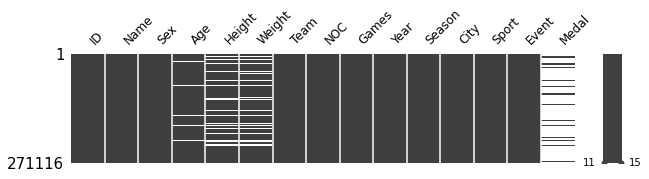

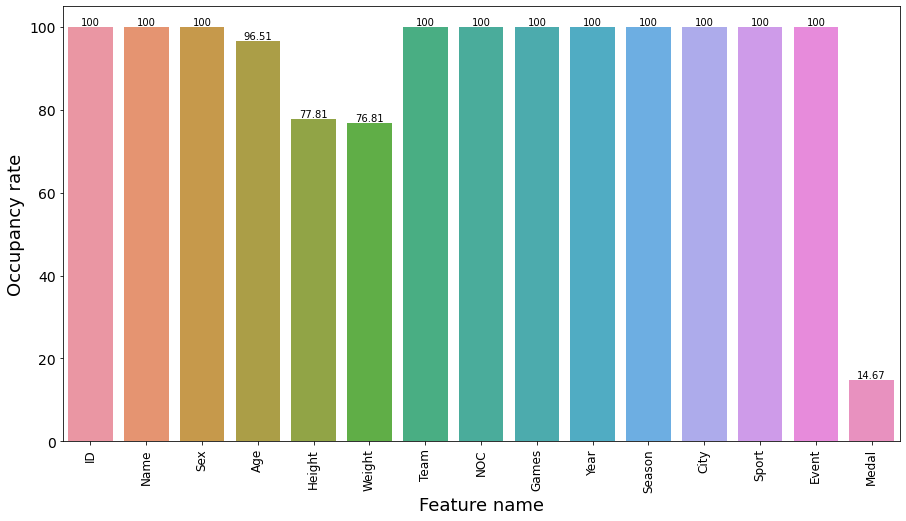

In [9]:
import missingno as msno
msno.matrix(df,figsize=(10,2),fontsize=12)
def boslukları_goster(df):
    
    ratiolist = []
    bosluk = []
    doluluk = []
 

    for i in range(len((df.columns))):
        bosluk.append(df[df.columns[i]].isna().sum())
        doluluk.append(len(df[df.columns[i]]))
            #return bosluk, doluluk
    
    for i in range(len(bosluk)):
        if bosluk[i]==0:
            ratiolist.append(100)
        else:
            a = np.round((np.array(100*(np.array(doluluk[i]).astype(float)- np.array(bosluk[i]).astype(float))/np.array(doluluk[i]).astype(float))),2)
            #b = a.tolist
            a = a.tolist()
            ratiolist.append(a)
        #return ratiolist
    #sozluk = dict(zip((list(df.columns)),ratiolist))
    #boslukdf = pd.DataFrame.from_dict(sozluk,orient='index',columns=['Ratio'])
    #boslukdf['Ratio'] = ratiolist
    boslukdf = pd.DataFrame(list(df.columns),columns=['Columns'])
    boslukdf['Ratio'] = ratiolist
    return boslukdf


def boslukları_gorsellestir (df,feature_name,occupancy_ratio):
    fig, ax=plt.subplots(1, figsize=(15,8))
    sns.barplot(x=feature_name, y=occupancy_ratio, data=df, ax=ax, capsize=.2,ci='sd')    
    plt.xticks(fontsize=12, rotation=90); # Rotating the names by 30 degrees as the names were mixing with each other 
    plt.yticks(fontsize=14);
    plt.xlabel('Feature name',fontsize=18)
    plt.ylabel('Occupancy rate',fontsize=18)
    ax.bar_label(ax.containers[0])
    plt.show()
boslukdf = boslukları_goster(df)
boslukları_gorsellestir(boslukdf,'Columns','Ratio')

Örneğin; Yaş kısmı eksik olan %5'e yakın bir kesim mevcut, yine aynı şekilde kilo ve boyu eksik olan %25'lik bir kısım var.
### Mesela Madalya kısmının bu şekilde olması oldukça doğal. 

[İçindekiler Menüsüne Git](#0.)        

# 4. Missing veriler <a id="4"></a>

missing dataları nasıl dolduralım veya dolduralım mı?
Aslında gelin önce madalya almışlara kısıtlamış olalım. Sonra kayıp verileri yeniden inceleyelim.

In [10]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

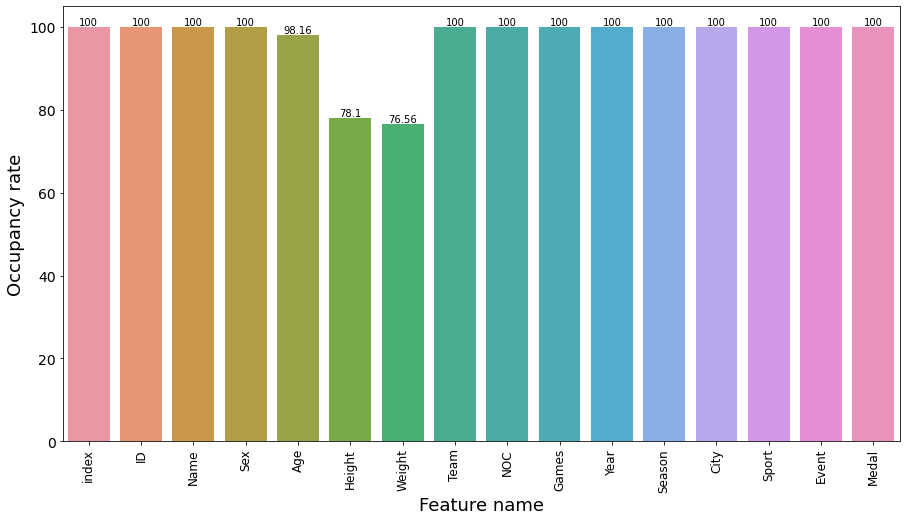

In [11]:
df = df[(df['Medal']=='Gold')|(df['Medal']=='Bronze')|(df['Medal']=='Silver')].reset_index()
boslukdf = boslukları_goster(df)
boslukları_gorsellestir(boslukdf,'Columns','Ratio')

In [12]:
print(f'Mesela diyelim ki tüm NaN verileri çıkarsak ne kadar veri kaybımız olur; % {100*(df.shape[0]-df.dropna(axis=0).shape[0])/df.shape[0]:.2f}')


Mesela diyelim ki tüm NaN verileri çıkarsak ne kadar veri kaybımız olur; % 24.14


Bence %24 veri kaybı oldukça fazla en doğrusu o şekilde olabilir ancak bir çok missing data doldurma yöntemleri vardır. Bu notebook veya kernelde bu ayrıntılı metodları kullanmayacağım, ileride eklerim belki.
ama gelin bunu Age sütunu için deneyelim.

<AxesSubplot:ylabel='Height'>

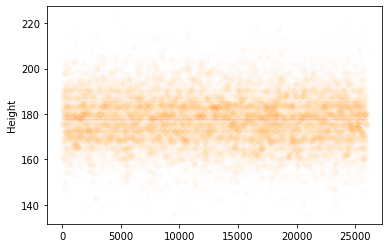

In [13]:
geçici_df = df.copy()
geçici_df['Age'] = geçici_df['Age'].fillna(geçici_df['Age'].mean(skipna=True))
sns.scatterplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=geçici_df['Height'].iloc[:26000],data=geçici_df.iloc[:26000],color='orange',alpha=.01)
sns.lineplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=177.55,alpha=.1,color='red')

Mean veriyi atadığımızda mean çizgi yerinde bunlar yoğunlaşıyor peki median veya başka bir model işe yarayamabilir.

<AxesSubplot:ylabel='Height'>

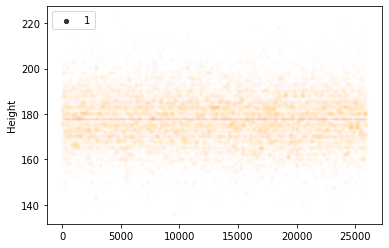

In [14]:
geçici_df = df.copy()
geçici_df['Age'] = geçici_df['Age'].fillna(geçici_df['Age'].mean(skipna=True))
sns.scatterplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=geçici_df['Height'].iloc[:26000],data=geçici_df.iloc[:26000],color='orange',alpha=.01,size=1)
sns.lineplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=177.55,alpha=.1,color='red')

In [15]:
# Bu kernel'i patlatıyordu bu nedenle bıraktım.
#geçici_df = df.copy()
#geçici_df['Age'] = geçici_df['Age'].fillna(geçici_df['Age'].mod(geçici_df[['Age']]))
#sns.scatterplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=geçici_df['Height'].iloc[:26000],data=geçici_df.iloc[:26000],color='orange',alpha=.01)
#sns.lineplot(x=range(len(geçici_df['Height'].iloc[:26000])),y=177.55,alpha=.1,color='red')

In [16]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = df['Age'].to_numpy().reshape(-1,1)
imp_mean.fit(X)
SimpleImputer()
X = imp_mean.transform(X)
X = pd.DataFrame(X)
X.isna().sum() #--> boş veri yok
#Mean atama şeklini böyle de kullanabiliriz
# Ama bence burada pandas daha güzel gibi duruyor burada farklı olarak;
# mean veya median yerine mod veya constant atayabiliyoruz;
# strategy için diğer parametreler; “most_frequent”, “constant”
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
X.describe().T

Boş değer sayısı: 0
skewness değeri: 1.5115591969844415


,count,mean,std,min,25%,50%,75%,max
0,39783.0,25.925175,5.859364,10.0,22.0,25.0,29.0,73.0


<AxesSubplot:ylabel='Count'>

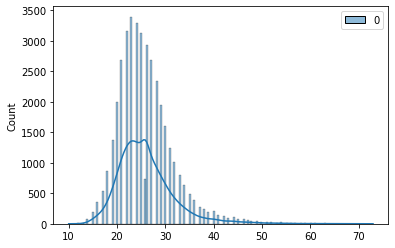

In [17]:
sns.histplot(X,kde=True)
#X.mean() ancak 25.9 civarında gördüğünüz üzere bir kalınlaşma mevcut orada bilgiler yığılmış durumda

In [18]:
from sklearn.impute import KNNImputer
X = df['Age'].to_numpy().reshape(-1,1)
imputer = KNNImputer(missing_values=np.nan, metric='nan_euclidean',weights='distance', n_neighbors=1)
X = imputer.fit_transform(X)
X = pd.DataFrame(X)
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
X.describe().T

Boş değer sayısı: 0
skewness değeri: 1.5115591969844415


,count,mean,std,min,25%,50%,75%,max
0,39783.0,25.925175,5.859364,10.0,22.0,25.0,29.0,73.0


<AxesSubplot:ylabel='Count'>

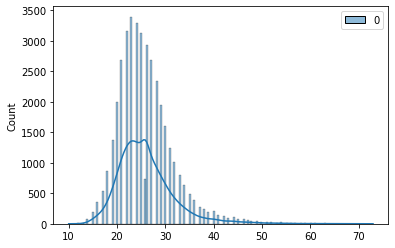

In [19]:
sns.histplot(X,kde=True)

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0,initial_strategy = 'constant')
#estimatorestimator object, default=BayesianRidge()
#missing_valuesint or np.nan, default=np.nan
#initial_strategy{‘mean’, ‘median’, ‘most_frequent’, ‘constant’}, default=’mean’
X = df['Age'].to_numpy().reshape(-1,1)
imp_mean.fit(X)
X = imp_mean.transform(X)
X = pd.DataFrame(X)
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
X.describe().T

Boş değer sayısı: 0
skewness değeri: 0.15799400928956148


,count,mean,std,min,25%,50%,75%,max
0,39783.0,25.448156,6.817015,0.0,22.0,25.0,29.0,73.0


<AxesSubplot:ylabel='Count'>

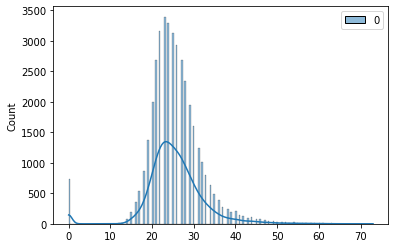

In [21]:
sns.histplot(X,kde=True)
#burada da sıfıra yolladı baya :D

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0,initial_strategy = 'most_frequent')
#estimatorestimator object, default=BayesianRidge()
#missing_valuesint or np.nan, default=np.nan
#initial_strategy{‘mean’, ‘median’, ‘most_frequent’, ‘constant’}, default=’mean’
X = df['Age'].to_numpy().reshape(-1,1)
imp_mean.fit(X)
X = imp_mean.transform(X)
X = pd.DataFrame(X)
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
X.describe().T

Boş değer sayısı: 0
skewness değeri: 1.526633221583469


,count,mean,std,min,25%,50%,75%,max
0,39783.0,25.871352,5.872537,10.0,22.0,25.0,29.0,73.0


<AxesSubplot:ylabel='Count'>

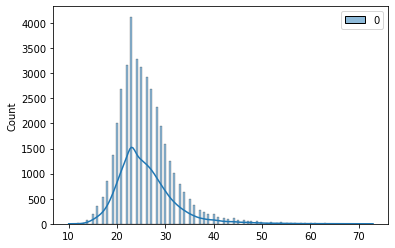

In [23]:
sns.histplot(X,kde=True)
#burada skewnesss değerini patlattık :D

Bunun yerine ben tabakalı atama yöntemlerini daha çok seviyorum. Bunda da en ayrık gruba göre atamayı seviyorum. Hangisi olduğunu bulalım.

In [24]:
for i in range(len(list(df.columns))):
    print(f'{list(df.columns)[i]} sütunu için {len(df[list(df.columns)[i]].unique())} adet özgün veri vardır')

index sütunu için 39783 adet özgün veri vardır
ID sütunu için 28251 adet özgün veri vardır
Name sütunu için 28202 adet özgün veri vardır
Sex sütunu için 2 adet özgün veri vardır
Age sütunu için 62 adet özgün veri vardır
Height sütunu için 87 adet özgün veri vardır
Weight sütunu için 185 adet özgün veri vardır
Team sütunu için 498 adet özgün veri vardır
NOC sütunu için 149 adet özgün veri vardır
Games sütunu için 51 adet özgün veri vardır
Year sütunu için 35 adet özgün veri vardır
Season sütunu için 2 adet özgün veri vardır
City sütunu için 42 adet özgün veri vardır
Sport sütunu için 66 adet özgün veri vardır
Event sütunu için 756 adet özgün veri vardır
Medal sütunu için 3 adet özgün veri vardır


Şimdi şöyle düşünelim;
Event sütununda 756 adet eşsiz değer var bunlar içerisinden iki grubu alalım ve değerlendirelim. Bu gruplardan birisi Erkek Basketbol takımları ile Erkek 1500 metre koşucuları gruplarını karşılatırdığımızda kilo dağılımları ciddi şekilde farklı dağılıma aittir. Bu nedenle ben kayıp verileri Event sütununa göre atamayı, eğer o grupta hiç değer yoksa ki Erkek jimnastik ekibinin tamamen kiloları dahil değildi bu gruba da median değerlerini atamayı tercih ettim.

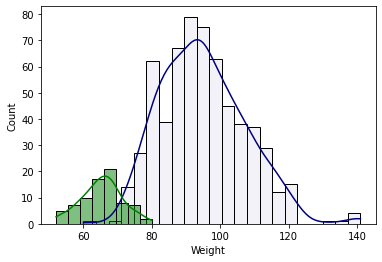

In [25]:
sns.histplot(df['Weight'][(df['Event']=="Basketball Men's Basketball")],kde=True,color='navy',alpha=0.05)
sns.histplot(df['Weight'][(df['Event']=="Athletics Men's 1,500 metres")],kde=True,color='green')
plt.show()

In [26]:
a = df['Weight'][(df['Event']=="Gymnastics Men's Team All-Around, Free System")].isna().sum()
print("Erkek jimnastik ekibinde kilo için kayıp veriler; ",a)
print("Erkek jimnastik grubu için kayıp veri yüzdesi: %",(100*(a/len(df['Weight'][(df['Event']=="Gymnastics Men's Team All-Around, Free System")]))) )

Erkek jimnastik ekibinde kilo için kayıp veriler;  109
Erkek jimnastik grubu için kayıp veri yüzdesi: % 100.0


Bu durumlar da da zaten normalde yapılan şekilde tüm grubun mean değerini atayabiliriz. Bunun gibi kaç grup var olduğuna bakalım.

In [27]:
empty_event_list = []
for i in range(len(df['Event'].unique())):
    a = len(df['Weight'][(df['Event']==list(df['Event'].unique())[i])])
    b = df['Weight'][(df['Event']==list(df['Event'].unique())[i])].isna().sum()
    if 100*(b/a) ==100:
        empty_event_list.append(list(df['Event'].unique())[i])
    else:
        pass
        
print(f"Tüm event özelliği içerisinde ki tamamen boş veri miktarı; {100*(len(empty_event_list)/(len(df['Event'].unique()))):.2f}")

Tüm event özelliği içerisinde ki tamamen boş veri miktarı; 25.26


O zaman yazalım kodumuzu;

In [28]:
#Fill nan values with complex function


def fillna (df,nancolumn,guidecolumn):
    """
This function have three parameters
1. df = pd.DataFrame
2. nancolumn = contain to NaN values
3. guidecolumn = I used this paramter for filter
For example; feature of 'a' have nan values in df DataFrame, I want to filling that.
Easisest way df.fillna(something) etc.
But it is make bias
In this kernel we have a lot of countries in DataFrame
For example; pop.loc[:,('Generosity','Country name')][(pop['Country name']=='Japan')] <-- Try this
Feature of Generosity include ten values for Japan, just one values is NaN in this array.
Best way is for replace this value, change with median of other unique Japan values. This def doing this.

"""
    uniquelist = list(df[(df[nancolumn].isna())][guidecolumn].unique())
    print("\nCHANGE COLUMN: {}".format(nancolumn))
    print('Unique values are: ',uniquelist)
    for i in uniquelist:
        summary = []
        isnanvalues = list(df.loc[df[guidecolumn].isin([i])][nancolumn].isna().reset_index(drop=True))
        for j in range(len(isnanvalues)):
            if isnanvalues[j] == True:
                pass
            else:
                summary.append(list(df.loc[df[guidecolumn].isin([i])][nancolumn].reset_index(drop=True))[j])
        if len(summary) > 0:
            changes = np.round((df[(~df[nancolumn].isna())&(df[guidecolumn]==i)][nancolumn].median(skipna=True)),2)
            print('Unique value is {} in {} feature'.format(i,nancolumn))
            mask = df[nancolumn].isna() & df[guidecolumn].eq(i)
            df.loc[mask, nancolumn] = changes
            print('Change with:',changes)
        elif len(summary) == 0:
            print('Unique value is {} in {} feature'.format(i,nancolumn))
            changes = np.round((df[nancolumn].median(skipna=True)),2)
            print('Change with:',changes)
            mask = df[nancolumn].isna() & df[guidecolumn].eq(i)
            df.loc[mask, nancolumn] = changes

In [29]:
list(df.columns[df.isnull().any()]) 

['Age', 'Height', 'Weight']

In [30]:
# bunu kullnarak yukarıdaki kod çalışıyor ama GPU desteğiyle bile neredeyse yarım saat sürüyor
#list_of_missed_values = list(df.columns[df.isnull().any()]) 
#list_of_missed_values = ['Age', 'Height', 'Weight']
#for i in list_of_missed_values:
#    fillna (df=df, nancolumn=i,guidecolumn='Event')

[İçindekiler Menüsüne Git](#0.)        

# 4.1 Hazır datasetin yüklenmesi <a id="4.1"></a>

In [31]:
df = pd.read_csv('/kaggle/input/fullyfilleddataset/fullyfilledolypics.csv')
df.head() 
regions=pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [32]:
# ben daha öncesinde bunu zaten kendi lokalimde Türkçe olarak 
# kaydetmiştim şimdi bunu yeniden ingilizceye çeviriyorum
df.rename(columns={
                     'isim':'name',
                     'cinsiyet': 'sex',
                     'yaş':'age',
                     'boy':'height',
                     'kilo':'weight',
                     'takım':'team',
                     'uok':'noc',
                     'oyunlar':'games',
                     'yil':'year',
                     'sezon':'season',
                     'sehir':'city',
                     'spor':'sport',
                     'etkinlik':'event',
                     'madalya':'medal'}, inplace=True )

In [33]:
df = pd.merge(df,regions,left_on='noc',right_on='NOC')
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

In [34]:
df = df[(df['medal']=='Gold')|(df['medal']=='Bronze')|(df['medal']=='Silver')].reset_index()

In [35]:
df.drop(columns=['Unnamed: 0','index'],inplace=True)
df.head()

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal,NOC,region,notes
0,An Yulong,M,19.0,173.0,70.0,China,CHN,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CHN,China,NaN
1,An Yulong,M,19.0,173.0,70.0,China,CHN,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,CHN,China,NaN
2,An Yulong,M,23.0,173.0,70.0,China,CHN,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,CHN,China,NaN
3,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,CHN,China,NaN
4,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,CHN,China,NaN


Boş değer sayısı: 0
skewness değeri: 0.040627213300271525
kurtosis değeri: 0.40950270912646003


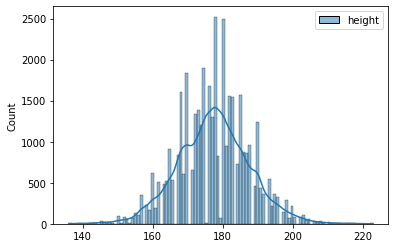

In [36]:
X = pd.DataFrame(df.height)
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
X.describe().T
sns.histplot(X,kde=True)
plt.show()

Boş değer sayısı: 0
skewness değeri: 0.04525242098425908
kurtosis değeri: 1.083350513534413


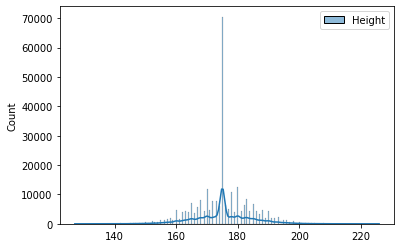

In [37]:
geçici_df = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
geçiçiweight = geçici_df['Height'].fillna(geçici_df['Height'].median(skipna=True))
X = pd.DataFrame(geçiçiweight)
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
X.describe().T
sns.histplot(X,kde=True)
plt.show()

## Gördüğünüz üzere oldukça farklı ve dağılımı daha homojen yapabildiğimizi düşünüyorum

<AxesSubplot:>

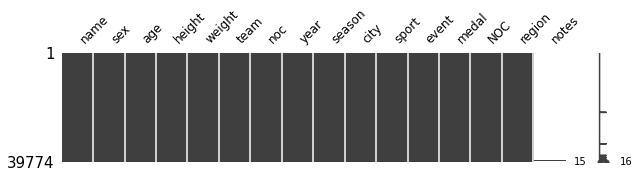

In [38]:
msno.matrix(df,figsize=(10,2),fontsize=12)
# Fully filled dataset mmmh

[İçindekiler Menüsüne Git](#0.)        

# 5. Univariate (Tek değişkenli) Analiz <a id="5"></a>

Özniteliklerimizi kategorikler ve nümerikler olarak yeniden çağıralım ve bunlar ayrı ayrı inceleyelim.

## Öncelikle nümerik verilere göz atalım

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

list(numeric_cols)

['age', 'height', 'weight', 'year']

## Normal dağılım testleri
* Skewness (Çarpıklık): -1,5 - +1,5 aralığını genelde kabul ediliyor, ama normal dağılımda bu 0 olacak şekilde beklenir
* Kurtosis (Basıklık): -1,5 - +1,5 aralığını genelde kabul ediliyor, ama normal dağılımda bu 0 olacak şekilde beklenir
* Kolmogorov-Smirnov: Eğer ki p value test sonucunda >0,05 çıkıyorsa H0 için reject to fail'e döner yani normal dağılma uygundur 
* Shapiro Wilk: Eğer ki p value test sonucunda >0,05 çıkıyorsa H0 için reject to fail'e döner yani normal dağılma uygundur.
    * Ancak scipy dökümanında 5 bin üzerinde tam çalışamayacağı belirtilmekte bu nedenle QQplot ile de inceleyeceğiz
* Bir diğer test ise Anderson - Darling testi olsa da return kısmı kafa karıştırıcı olacağından kullanmayacağım. [Gerekli dökümentasyon için;](http://https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

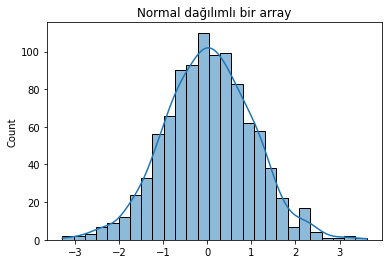

mean:  0.03327702789285542
standart deviation:  0.9898888284222432
Boş değer sayısı: 0.00
skewness değeri: 0.00
kurtosis değeri: 0.25
Kolmogorov-Smirnov değeri: 0.7055309335814528
Shapiro Wilk değeri:  0.6948493719100952


In [40]:
# parameters of normal distribution
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

#set seed (e.g. make this example reproducible)
seed(5)

#generate dataset of 100 random values that follow a standard normal distribution
data = randn(1000)
sns.histplot(data,kde=True)
plt.title('Normal dağılımlı bir array')
plt.show()
# Verinin dağılımının değerlendirilmesi
print("mean: ", np.mean(data))
print("standart deviation: ", np.std(data))
X = pd.DataFrame(data)
print(f'Boş değer sayısı: {X.isna().sum()[0]:.2f}')
print(f'skewness değeri: {X.skew()[0]:.2f}')
print(f'kurtosis değeri: {X.kurt()[0]:.2f}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(data, 'norm').pvalue)
print('Shapiro Wilk değeri: ', stats.shapiro(data).pvalue)

Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

[İçindekiler Menüsüne Git](#0.)  
# 5.1 QQ-plot <a id="5.1"></a>

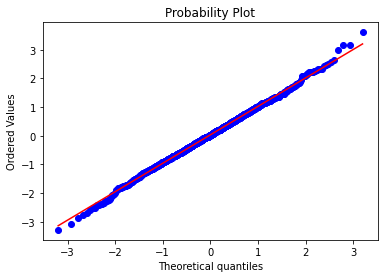

In [41]:
# QQ plot da normal dağılımı gösteren bir başka yöntemdir
data = pd.DataFrame(data)
measurements = list(data[0].values.astype(float))
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

### Vaaaooooovv

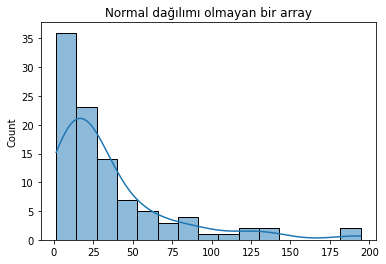

mean:  34.83414380513119
standart deviation:  38.23754307197407
Boş değer sayısı: 0.00
skewness değeri: 2.20
kurtosis değeri: 5.20
Kolmogorov-Smirnov değeri: 1.0
Shapiro Wilk değeri:  3.850856265807945e-12


In [42]:
from numpy.random import seed
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)
data = lognormal(3, 1, 100)
sns.histplot(data,kde=True)
plt.title('Normal dağılımı olmayan bir array')
plt.show()

#generate dataset of 100 values that follow a Poisson distribution with mean=5

print("mean: ", np.mean(data))
print("standart deviation: ", np.std(data))
X = pd.DataFrame(data)
print(f'Boş değer sayısı: {X.isna().sum()[0]:.2f}')
print(f'skewness değeri: {X.skew()[0]:.2f}')
print(f'kurtosis değeri: {X.kurt()[0]:.2f}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(data, 'norm', N=20000, alternative='greater', mode='auto').pvalue)
print('Shapiro Wilk değeri: ', stats.shapiro(data).pvalue)
# burada bilinçli logaritmik dağılım sunduk mesela bu nedenle burada normal dağılım olmayacak ama 
# kolmogorov için two-sided yerine sağ kuyruklu olduğundan greater demek lazım
# sonuçlarda da zaten KS için normal dağılımı destekleyecektir bu şekilde KS için pval>.05

Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

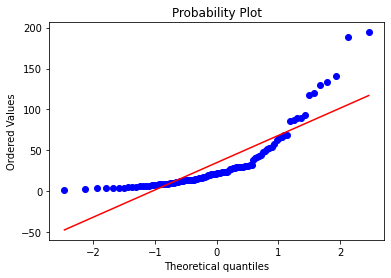

In [43]:
# QQ plot da normal dağılımı gösteren bir başka yöntemdir
data = pd.DataFrame(data)
measurements = list(data[0].values.astype(float))
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

### Böyle olacağını biz biliyorduk zaten

Boş değer sayısı: 0
skewness değeri: 1.4994177853688453
kurtosis değeri: 4.588661955649255
Kolmogorov-Smirnov değeri: KstestResult(statistic=1.0, pvalue=0.0)
Shapiro Wilk değeri:  ShapiroResult(statistic=0.9095755219459534, pvalue=0.0)


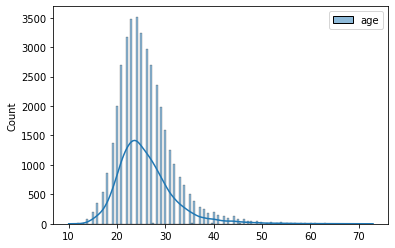

In [44]:
X = pd.DataFrame(df[['age']])
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(X, 'norm', N=20, alternative='two-sided', mode='auto'))
print('Shapiro Wilk değeri: ', stats.shapiro(X))
X.describe().T
sns.histplot(X,kde=True)
plt.show()

#### Eğer Shapiro Wilk bizim 27 bin verilik datamızda saçmalarsa QQplot kullanalım
* Ancak Yaş için;
    - Basıklık değeri yüksek olan, çarpıklığı kabul edilebilir aralıkta olan
    - Kolmogorov-Smirnov ve Shapiro-Wilk için normal dağılımın görüldüğü bir dağılımdır.
* Hadi diyelim kurtosis kafa karıştırdı QQplot'a koyalım.

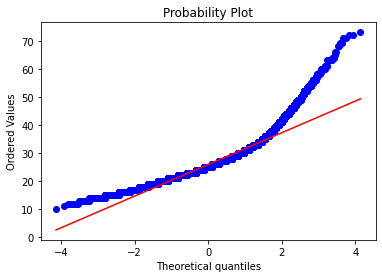

In [45]:
# QQ plot da normal dağılımı gösteren bir başka yöntemdir
measurements = list(X['age'].values.astype(float))
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Bence oldukça yakın!!

Boş değer sayısı: 0
skewness değeri: 0.6827995981699787
kurtosis değeri: 1.854323820696318
Kolmogorov-Smirnov değeri: KstestResult(statistic=1.0, pvalue=0.0)
Shapiro Wilk değeri:  ShapiroResult(statistic=0.9758015871047974, pvalue=0.0)


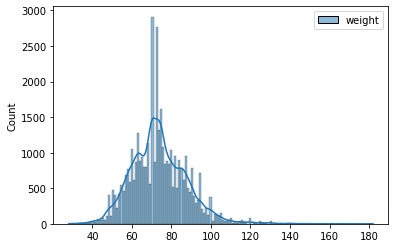

In [46]:
X = pd.DataFrame(df[['weight']])
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(X, 'norm', N=20, alternative='two-sided', mode='auto'))
print('Shapiro Wilk değeri: ', stats.shapiro(X))
X.describe().T
sns.histplot(X,kde=True)
plt.show()

### Kilo için yayılım analizi;
* Çarpıklık ve basıklık uygun aralıkta
* KS ve SW normal dağılımı desteklememektedir.
* QQplot ile değerlendirelim

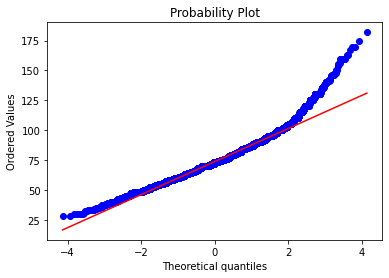

In [47]:
# QQ plot da normal dağılımı gösteren bir başka yöntemdir
measurements = list(X['weight'].values.astype(float))
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Normal dağılımdan bir miktar saptığını görebiliriz.

Boş değer sayısı: 0
skewness değeri: 0.040627213300271525
kurtosis değeri: 0.40950270912646003
Kolmogorov-Smirnov değeri: KstestResult(statistic=1.0, pvalue=0.0)
Shapiro Wilk değeri:  ShapiroResult(statistic=0.9970290660858154, pvalue=1.8418845186557146e-26)


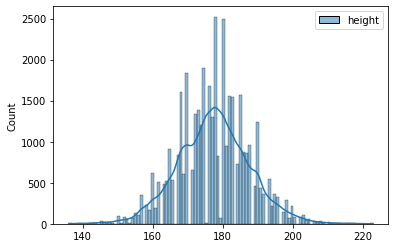

In [48]:
X = pd.DataFrame(df[['height']])
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(X, 'norm', N=20, alternative='two-sided', mode='auto'))
print('Shapiro Wilk değeri: ', stats.shapiro(X))
X.describe().T
sns.histplot(X,kde=True)
plt.show()

### Boy uzunluğu için yayılım analizi;
* Yine basıklık ve çarpıklık skorları oldukça güzel
* KS ve SW yine bunun için sıkıntı gösteriyor.
* QQ plot ile değerlendirelim

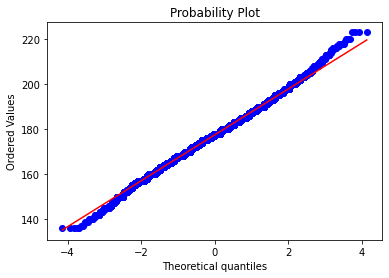

In [49]:
# QQ plot da normal dağılımı gösteren bir başka yöntemdir
measurements = list(X['height'].values.astype(float))
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()
# bunu normal kabul edebiliriz diye düşünüyorum

Boş değer sayısı: 0
skewness değeri: -0.695857130938589
kurtosis değeri: -0.6912608821693111
Kolmogorov-Smirnov değeri: KstestResult(statistic=1.0, pvalue=0.0)
Shapiro Wilk değeri:  ShapiroResult(statistic=0.9077768325805664, pvalue=0.0)


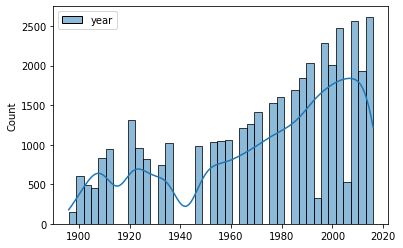

In [50]:
X = pd.DataFrame(df[['year']])
print(f'Boş değer sayısı: {X.isna().sum()[0]}')
print(f'skewness değeri: {X.skew()[0]}')
print(f'kurtosis değeri: {X.kurt()[0]}')
print('Kolmogorov-Smirnov değeri:',stats.kstest(X, 'norm', N=20, alternative='two-sided', mode='auto'))
print('Shapiro Wilk değeri: ', stats.shapiro(X))
X.describe().T
sns.histplot(X,kde=True)
plt.show()

##### Zaten yıl dağılımının normal aralığa uymasını düşünmek çok uygun olmayacaktır. Bu nedenle burada sadece bazı seneler yapılmadığını bilmek daha güzel bir demonstrasyondur.

[İçindekiler Menüsüne Git](#0.)  
## 5.2 Kategorik özniteliklerin analizi <a id="5.2"></a>
## 

In [51]:
categoric_cols = df.select_dtypes(include=['object']).columns

list(categoric_cols)

['name',
 'sex',
 'team',
 'noc',
 'season',
 'city',
 'sport',
 'event',
 'medal',
 'NOC',
 'region',
 'notes']

Kategorik sütunlar için genel olarak ayrı ayrı içlerinde ki dataların dağılımına bakabilirz. Burada en önemlisi sonuç belirttiği için muhtemelen madalyon sütunu olacaktır.

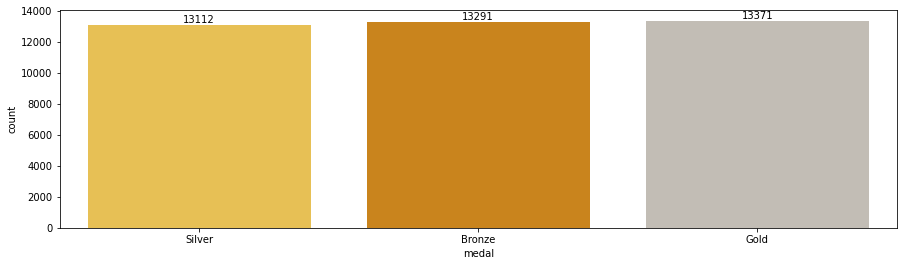

In [52]:
fig, ax=plt.subplots(1, figsize=(15,4))
sns.countplot(x=df.medal,palette = ["#ffcb3d","#e68a00","#c4bdb3"])
ax.bar_label(ax.containers[0])
# Her seferinde eşit sayılarda dağıtılmış diyebiliriz
plt.show()

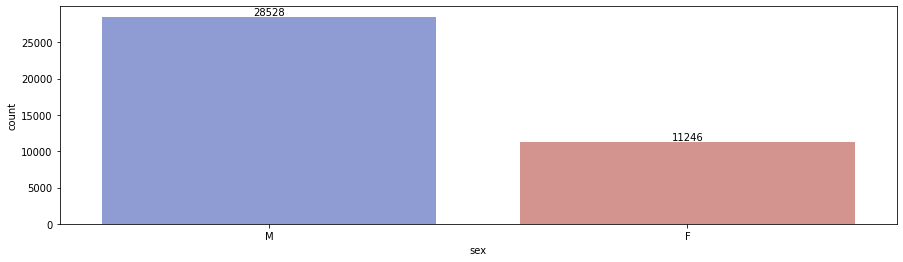

In [53]:
fig, ax=plt.subplots(1, figsize=(15,4))
sns.countplot(x=df.sex,palette=["#8395de","#de8983"])
ax.bar_label(ax.containers[0])
plt.show()

Neredeyse katılımcıların %60 kadarı erkek cinsiyetindenmiş

In [54]:
# Katılımcı sayısı en yüksek olan ilk on takımı görelim
sortedteam = pd.DataFrame(df.region.value_counts().index)
sortedteam['values'] = df.region.value_counts().values
sortedteam = sortedteam.iloc[:10]

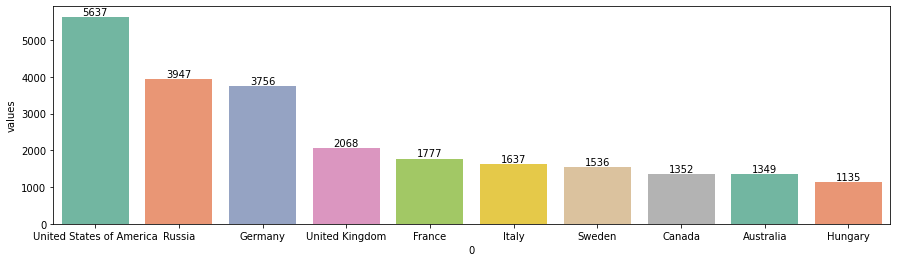

In [55]:
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortedteam[0],y=sortedteam['values'],data=sortedteam,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.show()


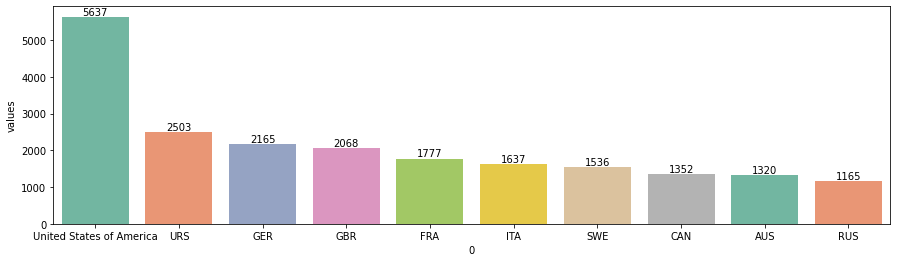

In [56]:
# Katılımcı sayısı en yüksek olan ilk on takımı görelim NOC ve Team aynı şeylerdi zaten
sortednoc = pd.DataFrame(df.noc.value_counts().index)
sortednoc['values'] = df.noc.value_counts().values
sortednoc = sortednoc.iloc[:10]
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortednoc[0],y=sortednoc['values'],data=sortednoc,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.show()

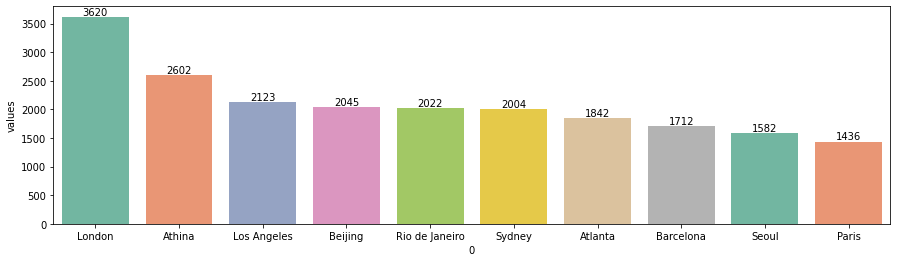

In [57]:
# Katılanların en çok katılım gösterdiği ilk 10 şehir
sortedcity = pd.DataFrame(df.city.value_counts().index)
sortedcity['values'] = df.city.value_counts().values
sortedcity = sortedcity.iloc[:10]
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortedcity[0],y=sortedcity['values'],data=sortedcity,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.show()

Şehir isimlerindense bunları ülkelerine göre değiştirelim, sonrasında daha güzel analizler yapabiliriz.

In [58]:
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function

df['Host_Country'] = df['city'].apply(host_country)

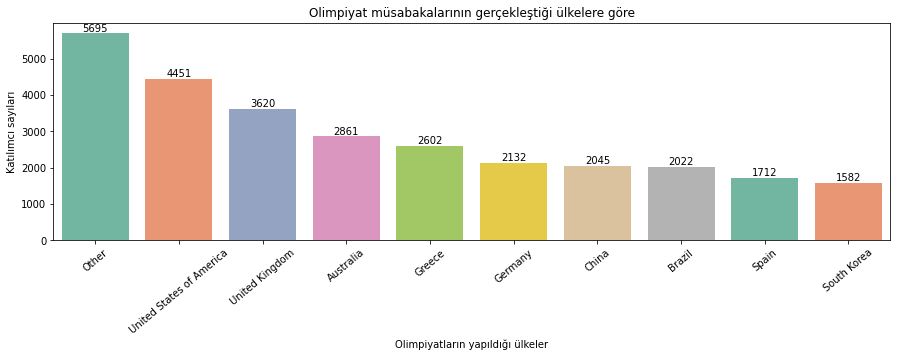

In [59]:
# Katılanların en çok katılım gösterdiği ilk 10 ülke
sortedhost_country = pd.DataFrame(df["Host_Country"].value_counts().index)
sortedhost_country['values'] = df["Host_Country"].value_counts().values
sortedhost_country = sortedhost_country.iloc[:10]
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortedhost_country[0],y=sortedhost_country['values'],data=sortedhost_country,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.xlabel('Olimpiyatların yapıldığı ülkeler')
plt.ylabel('Katılımcı sayıları')
plt.title('Olimpiyat müsabakalarının gerçekleştiği ülkelere göre')
plt.xticks(rotation=40)
plt.show()

### Şehirlerden farkı küçük kış olimpiyatları kümülatif olarak öne geçmekte ve amerikada birkaç kere farklı şehirlerde yapıldığından toplanıldığında İngiltere'yi geçiyor.

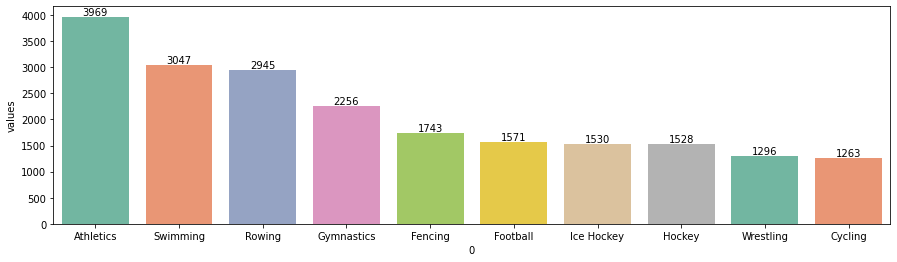

In [60]:
# Katılanların en çok katılım gösterdiği ilk 10 spor dalı
sortedsport = pd.DataFrame(df.sport.value_counts().index)
sortedsport['values'] = df.sport.value_counts().values
sortedsport = sortedsport.iloc[:10]
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortedsport[0],y=sortedsport['values'],data=sortedsport,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.show()

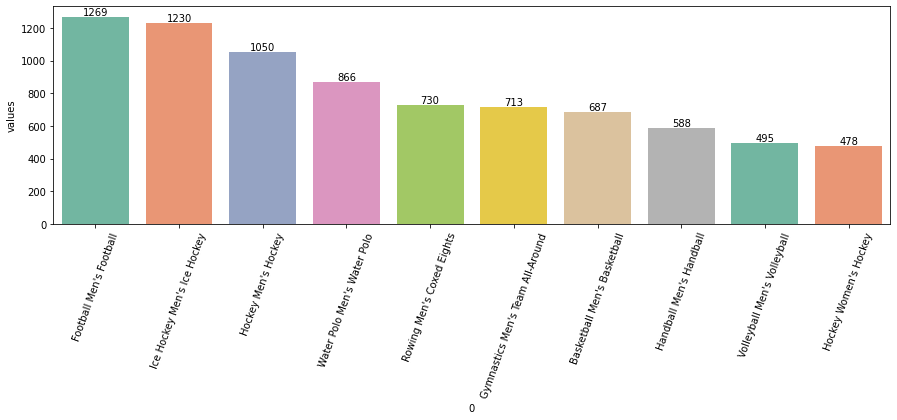

In [61]:
# Katılanların en çok katılım gösterdiği ilk 10 spor alt dalı
sortedevent = pd.DataFrame(df.event.value_counts().index)
sortedevent['values'] = df.event.value_counts().values
sortedevent = sortedevent.iloc[:10]
fig, ax=plt.subplots(1, figsize=(15,4))
sns.barplot(x=sortedevent[0],y=sortedevent['values'],data=sortedevent,capsize=.2,ci='sd',palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=70)
plt.show()

Bu kadar çok Hockey olacağını tahmin etmemiştim

[İçindekiler Menüsüne Git](#0.)        

# 6. Outlier'ların saptanması <a id="6"></a>

Outlier gibi aykırı değerler veya anomaliler için numerik veriler üzerinde işlem yapabiliriz bu nedenle numerik verilerden oluşan yeni bir dataset oluşturalım.

In [62]:
numeric_cols

Index(['age', 'height', 'weight', 'year'], dtype='object')

In [63]:
numericdf = pd.DataFrame(df[list(numeric_cols)])
numericdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39774.0,25.945681,5.910697,10.0,22.0,25.0,29.0,73.0
height,39774.0,177.421708,10.198018,136.0,170.0,178.0,184.0,223.0
weight,39774.0,73.720366,14.012958,28.0,64.0,73.0,82.0,182.0
year,39774.0,1973.936743,33.822507,1896.0,1952.0,1984.0,2002.0,2016.0


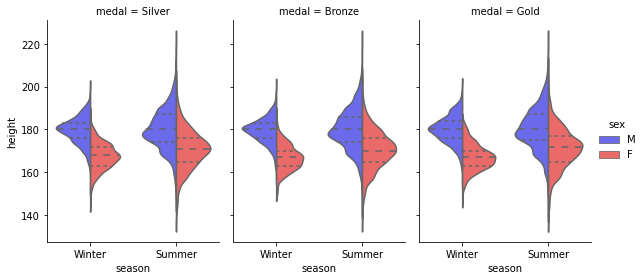

In [64]:
sns.catplot(x='season',y='height',hue='sex',col='medal',
           data=df,kind='violin',split=True,height=4,aspect=.7,
            palette='seismic',scale_hue=True,inner='quartile')
plt.show()

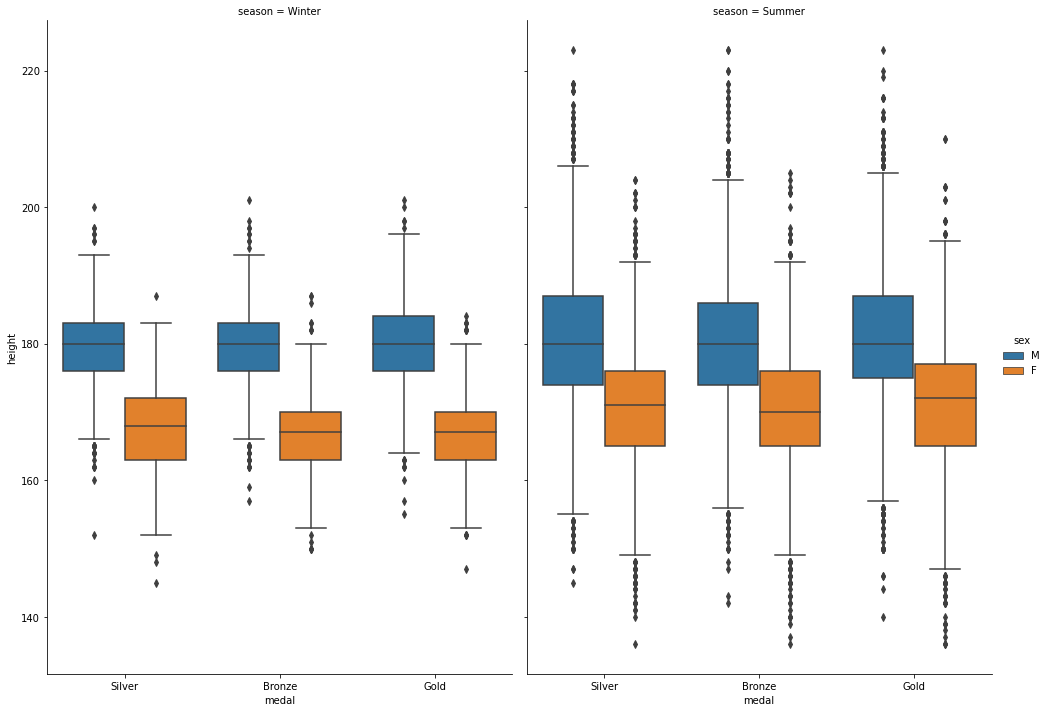

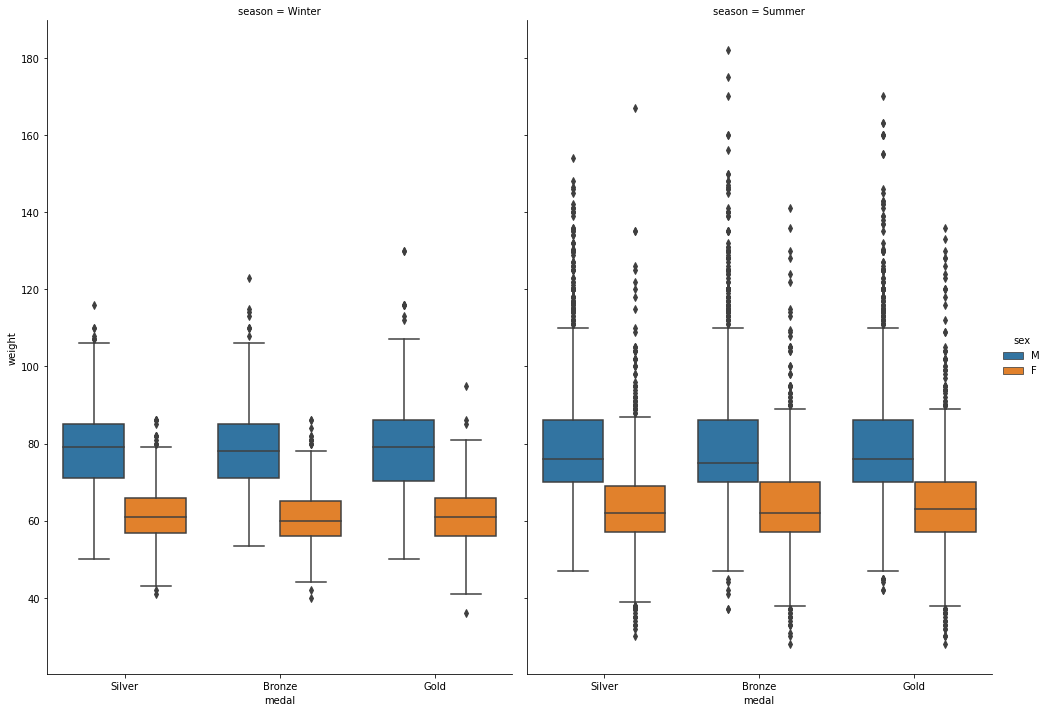

In [65]:
sns.catplot(x='medal',y='height',data=df,hue='sex',col='season',kind='box',height=10,aspect=.7)
sns.catplot(x='medal',y='weight',data=df,hue='sex',col='season',kind='box',height=10,aspect=.7)
plt.show()

#### Sporcunun özünde vardır zaten outlier olmak :D güçlü, kıvrak, zeki

* describe() metoduyla bunu hızlı bir değerlendirmek oldukça mümkün. Ancak spor grupları içerisinde sporun özelliklerine göre sporcuların özellikleri değişebilir. Ancak burada 250 cm birisi veya 10 kg olan bir sporcu olamadığı gibi 3 yaşında bir sporcu veya 3000 yılından katılan sporcu da olamaz. 

* describe() metoduyla gelen kısmı incelediğimizde;
    - Standart sapmaların IQR değerleri ile yakın olması ve mean - median değerlerinin benzeşmesi nedeniyle oldukça az olacağı düşünülebilir. 

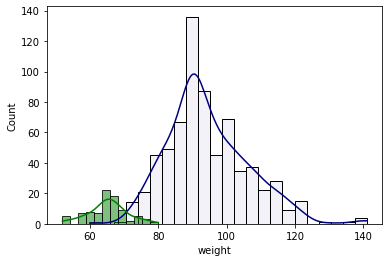

In [66]:
sns.histplot(df['weight'][(df['event']=="Basketball Men's Basketball")],kde=True,color='navy',alpha=0.05)
sns.histplot(df['weight'][(df['event']=="Athletics Men's 1,500 metres")],kde=True,color='green')
plt.show()

In [67]:
def anomaliescatcher(df,ozellik):
    outlier_indices = []
    for each in ozellik:
        # Q1 için
        Q1 = np.percentile(df[each],25)
        Q3 = np.percentile(df[each],75)
        IQR = Q3-Q1
        # aykırı değer için ek adım miktarı
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[each]<Q1-outlier_step)|(df[each]>Q3+outlier_step)].index
        #tespit edilen indexleri toplayalım
        outlier_indices.extend(outlier_list_col)
    #unique values
    outlier_indices = Counter(outlier_indices)
    # Örnek v adet sütunda farklı değerse bunu aykırı kabul ederiz
    multiple_outliers = list(i for i,v in outlier_indices.items()if v >1)
    return multiple_outliers



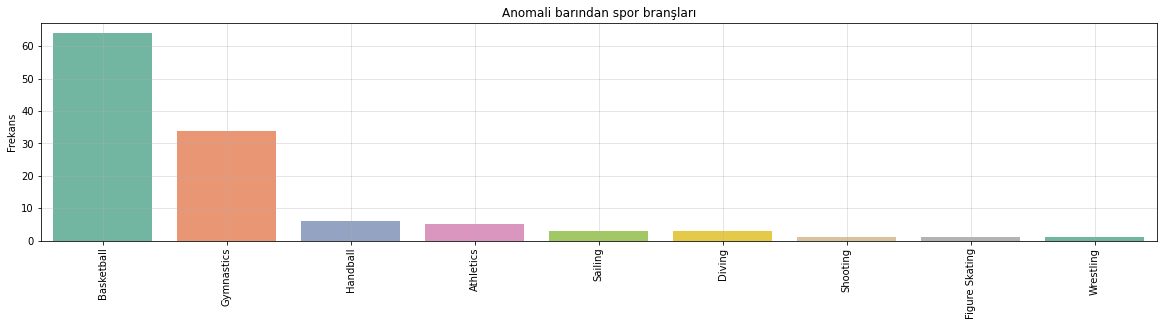

In [68]:
anomalik_data = df.loc[anomaliescatcher(df,list(numeric_cols))]
plt.figure(figsize=(20,4))
sns.barplot(x=anomalik_data.sport.value_counts().index,y=anomalik_data.sport.value_counts().values,data=anomalik_data,palette='Set2')
plt.xticks(rotation=90)
plt.title('Anomali barından spor branşları')
plt.ylabel('Frekans')
plt.grid(True,alpha=0.4)
plt.show()

In [69]:
anomalik_data = df.loc[anomaliescatcher(df,list(numeric_cols))]
index_list_of_anomalies = list(anomalik_data.index) # saptadığımız indeksler bunlar %2-3 gibi bir kayıp ile, 
#daha preceise bir datasetimiz olacak
df = df.loc[df.index.drop(index_list_of_anomalies)]

In [70]:
anomalik_data = df.loc[anomaliescatcher(df,list(numeric_cols))]
anomalik_data.shape # --> görüldüğü üzere gürültü (noise) azaltılmış oldu
# bu indeks verileri mean, median, mod ile de doldurabiliriz

(0, 17)

[İçindekiler Menüsüne Git](#0.)        

# 7. Feature Engineering <a id="7"></a>

Bu kısım ile ilgili bu veriseti için bir çıkarım yapmak henüz mümkün değil.


# 8. Bivariate (ikili değişken) Analiz <a id="8"></a>

### İkili değişkenler için ilk incelenecek olan sıklıkla nümerik değişkenlerdir dolayısıyla ilk olarak bunların korelasyonlarının ve kovaryasyonlarının değerlerini değerlendirelim.

In [71]:
# Correlation and Covariance between the features

def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):

    corr_matrix_abs = df.corr(method=corr_method)
    
    corr_matrix_abs_us = corr_matrix_abs.unstack().reset_index()
    sorted_correlated_features = corr_matrix_abs_us 

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
    corrdf = pd.DataFrame(sorted_correlated_features)
    corrdf['Correlation Result'] = ['Inverse Proportion' if corrdf[["Correlation"]].values.tolist()[i][0] < 0 
                                    else 'Direct Proportion' for i in range(len(corrdf[["Correlation"]].values.tolist()))]
    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features



def get_feature_covariance(df, min_periods=None, ddof=1,
                            remove_duplicates=True, top_n=None, remove_self_cov=True):

    cov_matrix_abs = df.cov(min_periods=None, ddof=1)
    cov_matrix_abs_us = cov_matrix_abs.unstack()
    sorted_cov_features = cov_matrix_abs_us.reset_index()

    # Remove comparisons of the same feature
    if remove_self_cov:
        sorted_cov_features = sorted_cov_features[
            (sorted_cov_features.level_0 != sorted_cov_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_cov_features = sorted_cov_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_cov_features.columns = ['Feature 1 cov', 'Feature 2 cov', 'Covariance']
    covdf = pd.DataFrame(sorted_cov_features)
    covdf['Covariance Result'] = ["Doesn't Related" if covdf[["Covariance"]].values.tolist()[i][0] < 0 else 'Related' for i in range(len(covdf[["Covariance"]].values.tolist()))]
    if top_n:
        return sorted_cov_features[:top_n]

    return sorted_cov_features

def get_corr_cov_df (df,bound= 0.5): #bound input is a filter, default I decided to 0.5.
    
    covdf = pd.DataFrame(get_feature_covariance(df))
    corrdf = pd.DataFrame(get_feature_correlation(df))
    corrcovdf = pd.concat([corrdf, covdf],ignore_index=False, axis=1, join = 'outer',keys=None,)
    corrcovdf = corrcovdf[((corrcovdf["Correlation"] >= bound) | (corrcovdf["Correlation"]<= -bound)) & (corrcovdf["Correlation"] !=1.000)]
    corrcovdf = corrcovdf.sort_values(by= ['Correlation'], ascending=False)
    corrcovdf = corrcovdf.drop(columns=['Feature 1 cov','Feature 2 cov'])
    my_df = corrcovdf.copy()
    return(my_df)

get_corr_cov_df(df,0)

,Feature 1,Feature 2,Correlation,Correlation Result,Covariance,Covariance Result
6,height,weight,0.820998,Direct Proportion,109.431601,Related
8,weight,age,0.144926,Direct Proportion,10.572471,Related
1,age,height,0.067954,Direct Proportion,3.490881,Related
3,age,year,0.008013,Direct Proportion,-18.896376,Doesn't Related
11,weight,year,-0.026882,Inverse Proportion,-1.814534,Doesn't Related


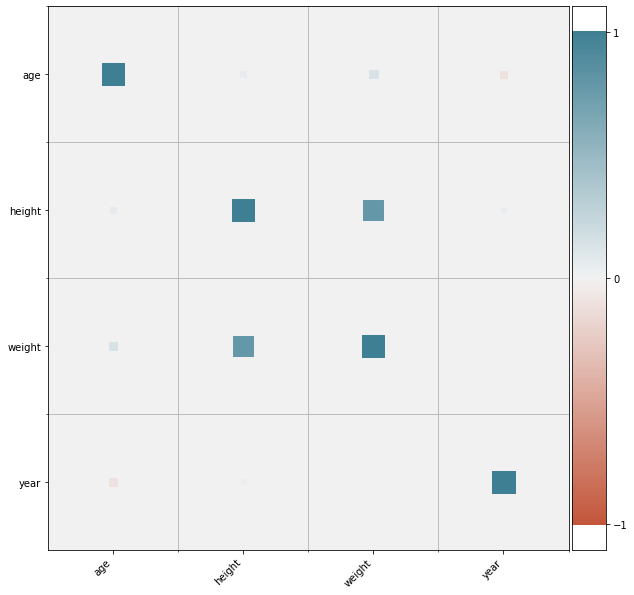

In [72]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        
def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )
corr = numericdf.corr()
plt.figure(figsize=(10, 10))
corrplot(corr)

### Nümerik değişkenlerimiz içerisinde beklenildiği üzere sadece boy ve kilo arasında bir ilişki kurulabilir.
* Pairplot ile de bir takım özellikleri karşılaştırdım, ancak bunu her zaman çalıştırmak oldukça zaman çalabilir. 

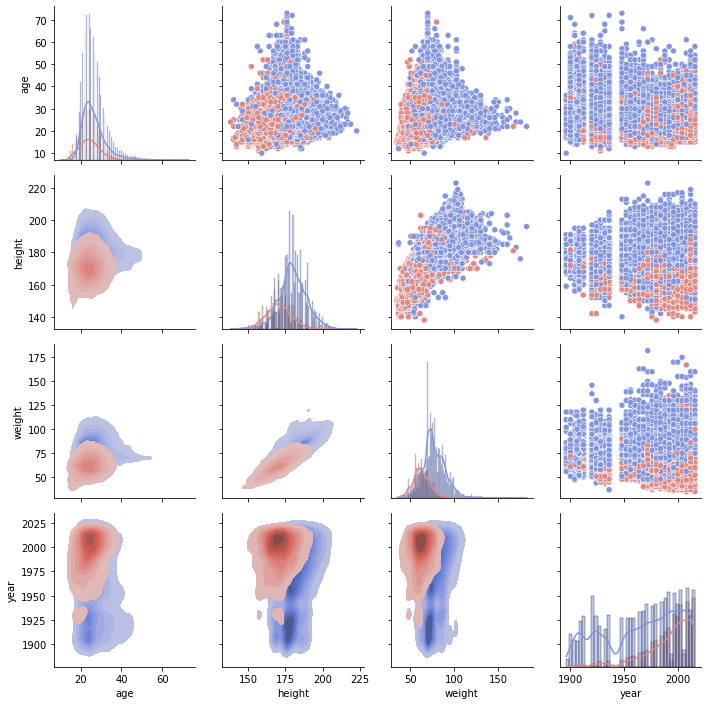

In [73]:
g = sns.PairGrid(df,hue='sex',palette=["#8395de","#de8983"])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot,kde=True)
plt.show()

* Erkek katılımcıların yaş dağılımında maksimum yaşlar kadınlara kıyasla daha yüksektir.
    - Çünkü yine muhtemelen bu yüksek yaş dağılımı geçmişte erkek egemen bir müsabaka olasıyla ilişkilidir ki;
    - Yıllara göre değişim yaş özniteliğinde değerlendirildiğinde görülecektirki, kadınların 1925'lerden sonra katılımlara başlarkenkadınların yaşları artarken erkek katılımcıların yaşları belirgin şekilde azalmaktadır
* Burada WW-1 ve WW-2'leri de görmek oldukça mümkün
* Kilo ve Boy ile alakalı olarak normal dağılımlardan bahsetmiştik
* Yıllar ilerledikçe katılımcı kadınların boy ve kilolarının artmasını da ayrıca göstermem gerektiğini düşünüyorum.

* Daha önce bulmadığımız ancak bu plot ile söyleyebileceğimiz şey belki de bu grafikten görüleceği üzere boy ve kilonun lineer bir ilişkisi olduğunu söyleyebiliriz. 
#### hue= özelliğiyle görseller üzerinden cinsiyet veya madalyonlar üzerinden bir çıkarım yapabilecek miyiz görelim.

[İçindekiler Menüsüne Git](#0.)  
## 8.1 Cinsiyete göre bivariate <a id="8.1"></a>
## 

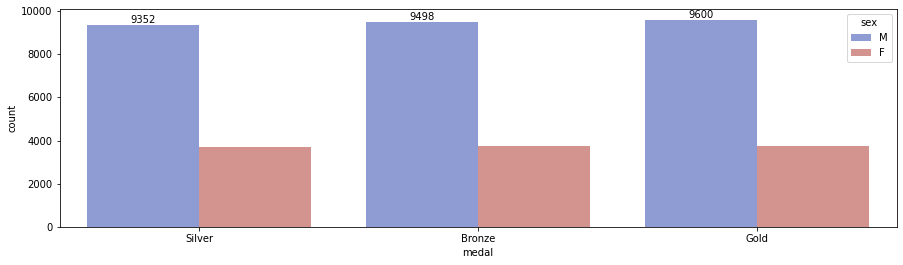

In [74]:
# mesela ilk olarak tahmin ediyor olsam da cinsiyetlere göre madalyon sayılarını inceleyelim.

fig, ax=plt.subplots(1, figsize=(15,4))
sns.countplot(x=df.medal,palette=["#8395de","#de8983"],hue=df.sex)
ax.bar_label(ax.containers[0])
# Her seferinde eşit sayılarda dağıtılmış diyebiliriz
plt.show()

In [75]:
# yanıldığımı kabul ediyorum, öyleyse senelere göre kadın erkek katılımlarını karşılaştıralım. 
df_sex = df.copy()
df_sex_sorted = df_sex.sort_values(by='year',ascending=True)
female_y = df_sex_sorted[(df_sex_sorted['sex']=='F')].year.value_counts(sort = True, ascending=True).values
female_x = df_sex_sorted[(df_sex_sorted['sex']=='F')].year.value_counts(sort = True, ascending=True).index
male_y = df_sex_sorted[(df_sex_sorted['sex']=='M')].year.value_counts(sort = True, ascending=True).values
male_x = df_sex_sorted[(df_sex_sorted['sex']=='M')].year.value_counts(sort = True, ascending=True).index

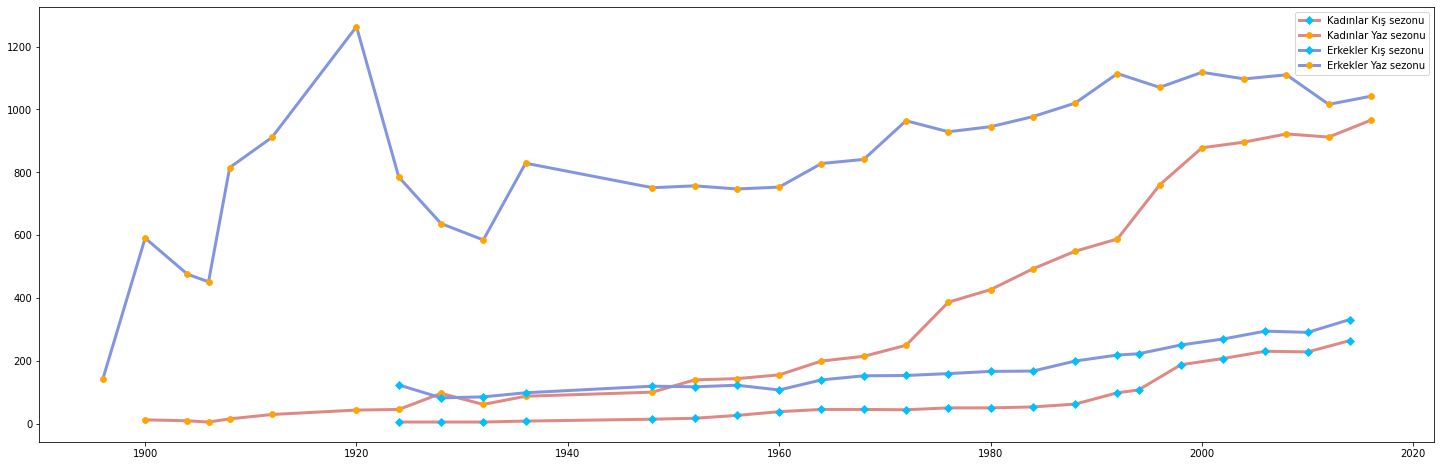

In [76]:
female_count_by_year_winter = df[(df.sex=='F')&(df.season=='Winter')].year.value_counts()
female_count_by_year_summer = df[(df.sex=='F')&(df.season=='Summer')].year.value_counts()
male_count_by_year_winter = df[(df.sex=='M')&(df.season=='Winter')].year.value_counts()
male_count_by_year_summer = df[(df.sex=='M')&(df.season=='Summer')].year.value_counts()
plt.figure(figsize=(25,8))
sns.lineplot(x=female_count_by_year_winter.index,y=female_count_by_year_winter.values,color='#de8983',label='Kadınlar Kış sezonu',
             linewidth = 3,markers=True,marker='D',mfc='deepskyblue',ms=6,mec='deepskyblue')
sns.lineplot(x=female_count_by_year_summer.index,y=female_count_by_year_summer.values,color='#de8983',label='Kadınlar Yaz sezonu',
             linewidth = 3,markers=True,marker='o',mfc='orange',ms=6,mec='orange')
sns.lineplot(x=male_count_by_year_winter.index,y=male_count_by_year_winter.values,color='#8395de',label='Erkekler Kış sezonu',
             linewidth = 3,markers=True,marker='D',mfc='deepskyblue',ms=6,mec='deepskyblue')
sns.lineplot(x=male_count_by_year_summer.index,y=male_count_by_year_summer.values,color='#8395de',label='Erkekler Yaz sezonu',
             linewidth = 3,markers=True,marker='o',mfc='orange',ms=6,mec='orange')

sns.set_style("darkgrid")



Buradan da görüleceği üzere kadınlar önce yaz oyunlarına başlamış daha sonrasında ise kış oyunlarına başlamışlardır, zamanda kadın ve erkek sayısı birbirine oldukça fazla şekilde yaklaşırken her zaman erkek dallarında üstünlük devam etmiştir.

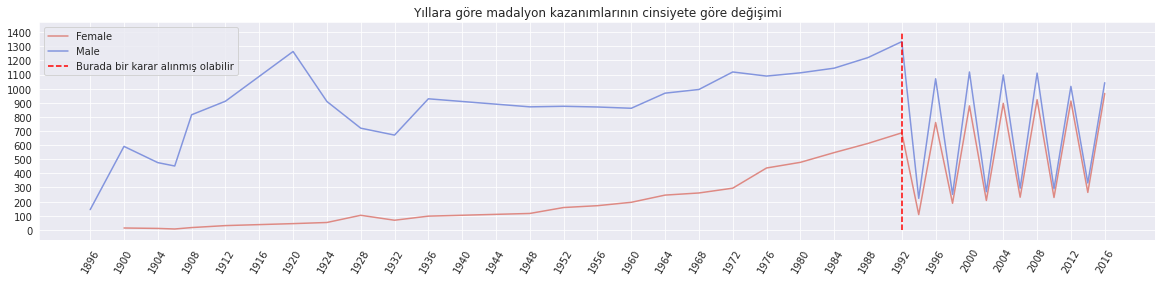

In [77]:
plt.figure(figsize=(20,4))
sns.lineplot(x=female_x,y=female_y,color='#de8983',label='Female',markers=True, dashes=False)
sns.lineplot(x=male_x,y=male_y,color='#8395de',label='Male',markers=True, dashes=True)
plt.xticks(range(1896,2020,4),rotation=60)
plt.yticks(range(0,1500,100))
plt.vlines(x=1992,ymin=0,ymax=1400,linestyles='dashed',color='red',label='Burada bir karar alınmış olabilir')
plt.title('Yıllara göre madalyon kazanımlarının cinsiyete göre değişimi')

plt.legend()
plt.show()

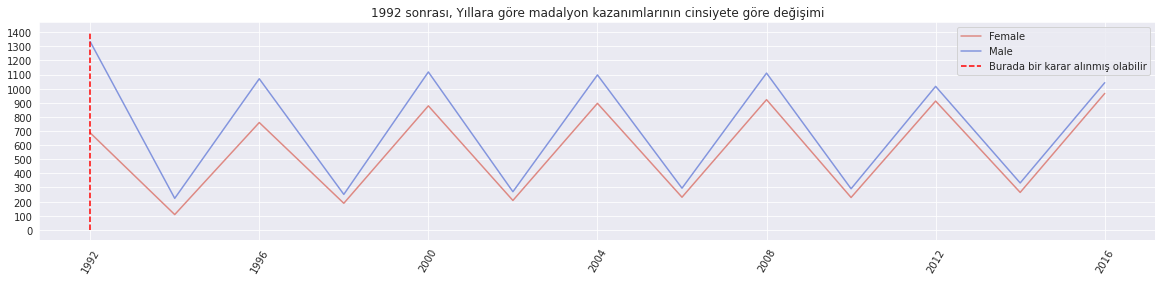

In [78]:
#1992 sonrasına daha yakından bakalım şimdi
df_sex_sorted = df_sex.sort_values(by='year',ascending=True)
female_y = df_sex_sorted[(df_sex_sorted['sex']=='F')&(df_sex_sorted['year']>=1992)].year.value_counts(sort = True, ascending=True).values
female_medal = df_sex_sorted[(df_sex_sorted['sex']=='F')&(df_sex_sorted['year']>=1992)]
male_medal = df_sex_sorted[(df_sex_sorted['sex']=='M')&(df_sex_sorted['year']>=1992)]
female_x = df_sex_sorted[(df_sex_sorted['sex']=='F')&(df_sex_sorted['year']>=1992)].year.value_counts(sort = True, ascending=True).index
male_y = df_sex_sorted[(df_sex_sorted['sex']=='M')&(df_sex_sorted['year']>=1992)].year.value_counts(sort = True, ascending=True).values
male_x = df_sex_sorted[(df_sex_sorted['sex']=='M')&(df_sex_sorted['year']>=1992)].year.value_counts(sort = True, ascending=True).index
plt.figure(figsize=(20,4))
sns.lineplot(x=female_x,y=female_y,color='#de8983',label='Female')
sns.lineplot(x=male_x,y=male_y,color='#8395de',label='Male')
plt.xticks(range(1896,2020,4),rotation=60)
plt.yticks(range(0,1500,100))
plt.vlines(x=1992,ymin=0,ymax=1400,linestyles='dashed',color='red',label='Burada bir karar alınmış olabilir')
plt.title('1992 sonrası, Yıllara göre madalyon kazanımlarının cinsiyete göre değişimi')
plt.legend()
plt.show()

[İçindekiler Menüsüne Git](#0.)  
## 8.2 Ülkelere göre bivariate analiz <a id="8.2"></a>
## 




Ülkelere göre değerlendirelim şimdi;

In [79]:
team_medal = pd.melt(df,id_vars="region",value_vars=["medal"])#.team.value_counts().index
gold_country = []
gold_values = []
for i in range(len(list(team_medal[(team_medal['value']=='Gold')].value_counts().index))):
    gold_country.append(list(team_medal[(team_medal['value']=='Gold')].value_counts().index)[i][0])
    gold_values.append(list(team_medal[(team_medal['value']=='Gold')].value_counts().values)[i])
gold_team_df = pd.DataFrame(data= gold_country)
gold_team_df['Values'] = gold_values
gold_team_df.rename(columns={0:'Country'},inplace=True)
#gold_team_df[:10]

In [80]:
team_medal = pd.melt(df,id_vars="region",value_vars=["medal"])#.team.value_counts().index
silver_country = []
silver_values = []
for i in range(len(list(team_medal[(team_medal['value']=='Silver')].value_counts().index))):
    silver_country.append(list(team_medal[(team_medal['value']=='Silver')].value_counts().index)[i][0])
    silver_values.append(list(team_medal[(team_medal['value']=='Silver')].value_counts().values)[i])
silver_team_df = pd.DataFrame(data= silver_country)
silver_team_df['Values'] = silver_values
silver_team_df.rename(columns={0:'Country'},inplace=True)
#silver_team_df[:10]

In [81]:
team_medal = pd.melt(df,id_vars="region",value_vars=["medal"])#.team.value_counts().index
bronze_country = []
bronze_values = []
for i in range(len(list(team_medal[(team_medal['value']=='Bronze')].value_counts().index))):
    bronze_country.append(list(team_medal[(team_medal['value']=='Bronze')].value_counts().index)[i][0])
    bronze_values.append(list(team_medal[(team_medal['value']=='Bronze')].value_counts().values)[i])
bronze_team_df = pd.DataFrame(data= bronze_country)
bronze_team_df['Values'] = bronze_values
bronze_team_df.rename(columns={0:'Country'},inplace=True)
#bronze_team_df[:10]

In [82]:
concat_medal = pd.concat([gold_team_df[:10],silver_team_df[:10],bronze_team_df[:10]],axis=1,ignore_index=True,)
concat_medal.rename(columns={0:'Country_for_gold',
                             1:'Gold_medal',
                             2:'Country_for_silver',
                             3:'Silver_medal',
                             4:'Country_for_bronze',
                             5:'Bronze_medal'},inplace=True)
concat_medal

,Country_for_gold,Gold_medal,Country_for_silver,Silver_medal,Country_for_bronze,Bronze_medal
0,United States of America,2623,United States of America,1640,United States of America,1356
1,Russia,1587,Germany,1193,Germany,1256
2,Germany,1299,Russia,1163,Russia,1171
3,United Kingdom,678,United Kingdom,739,France,666
4,Italy,575,France,609,United Kingdom,650
5,France,501,Italy,528,Sweden,535
6,Sweden,479,Sweden,522,Italy,531
7,Canada,463,Australia,459,Australia,522
8,Hungary,432,Canada,438,Canada,451
9,Norway,378,Norway,361,Finland,432


### Eğer ülkelerin ayrı ayrı Spor dallarına göre aldıkları toplam madalyaları görmek isteseydik;
- En fazla madalyon sayısı Atletizm'de sonrasında onu yüzücülük izliyor

In [83]:
list(df['sport'].value_counts().index[:5])

['Athletics', 'Swimming', 'Rowing', 'Gymnastics', 'Fencing']

1 = United States of America
2 = Russia
3 = Germany
4 = United Kingdom
5 = Jamaica


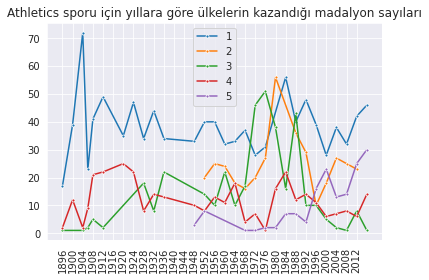

In [84]:
def country_medal_by_sport (df,sport_name,team_number):
    '''
    df --> mine dataframe
    sport_name --> you can find sport type with list(df.sport.value_counts().index)
    team_number --> Specify how many countries you want to plot
    
    '''
    first_n_country_for_this_sport = list(df[(df.sport==sport_name)].region.value_counts()[:team_number].index)
    countries = first_n_country_for_this_sport
    for i in range(len(countries)):
        medal = df[(df['region']==countries[i])&(df.sport==sport_name)].year.value_counts()
        #plt.figure(figsize=(20,5))
        sns.lineplot(x=medal.index,y=medal.values,label=(i+1),markers=True,marker='.')
        plt.legend(loc='best')
        plt.xticks(range(1896,2016,4),rotation=90)
        plt.title(f'{sport_name} sporu için yıllara göre ülkelerin kazandığı madalyon sayıları')
        print((i+1),'=',countries[i])
    return


country_medal_by_sport(df,'Athletics',5)  

* Amerikanın atletizmde baya iyi olduğunu görmekteyiz, buradaki ilginç olarak sondan katılan ülke sanırım Jamaica. Ussain Bolt ile alakalı olabilir.

1 = United States of America
2 = Australia
3 = Germany
4 = Russia
5 = United Kingdom


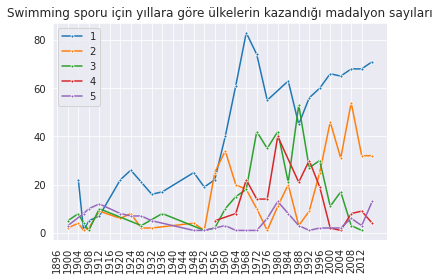

In [85]:
country_medal_by_sport(df,'Swimming',5)  

* Çok büyük bir ihtimalle Michael Phelps tek başına bu grafiği değiştirmiş olmalı.

1 = Germany
2 = United States of America
3 = United Kingdom
4 = Canada
5 = Italy


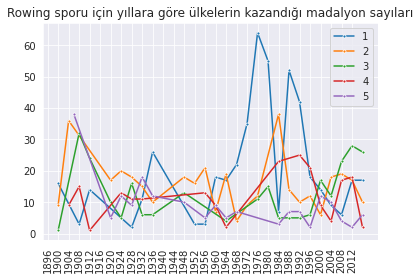

In [86]:
country_medal_by_sport(df,'Rowing',5)  

Amerika burada 1.'liğini Almanya'ya bıraktı. Almanların okçulukla ilişkileri daha belirgin diyebiliriz.

1 = Russia
2 = United States of America
3 = Japan
4 = Germany
5 = Romania


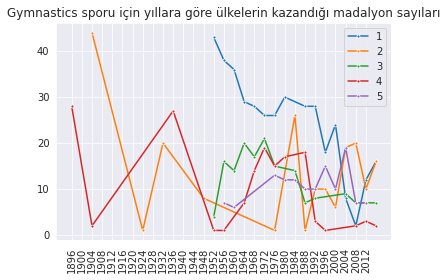

In [87]:
country_medal_by_sport(df,'Gymnastics',5) 

Yıllar içerisinde, favori ülkelerin ilgisi azalmış, burada sonradan katılmağa başlayan japonya ve muhtemelen de Rusyanın Sovyet döneminde ki madalyonlarının sahibi romanyanın devam ettiğini görebiliyoruz.

1 = Italy
2 = France
3 = Hungary
4 = Russia
5 = Germany


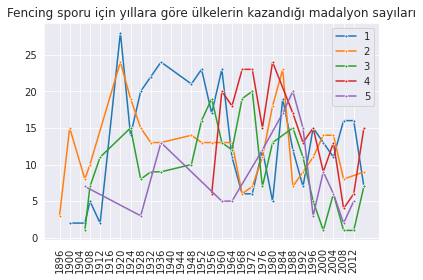

In [88]:
country_medal_by_sport(df,'Fencing',5) 

* Eskrim dalında ise İtalya, Fransa ve Macaristanın ilk üçü çekmiş olduğu ilginç bir liste olmuş.

[İçindekiler Menüsüne Git](#0.)  
## 8.3 En çok 10 madalyon kazanan ülkeler <a id="8.3"></a>
## 

In [89]:
first_ten_countries_for_medal_df = df[(df['region']=='United States of America')|(df['region']=='Russia')|(df['region']=='Germany')|
  (df['region']=='United Kingdom')|(df['region']=='France')|(df['region']=='Italy')|
  (df['region']=='Sweden')|(df['region']=='Australia')|(df['region']=='Canada')|
  (df['region']=='Hungary')]
first_ten_countries_for_medal_df.region.value_counts()

United States of America    5619
Russia                      3921
Germany                     3748
United Kingdom              2067
France                      1776
Italy                       1634
Sweden                      1536
Canada                      1352
Australia                   1349
Hungary                     1135
Name: region, dtype: int64

In [90]:
values =['United States of America', 'Russia', 'Germany', 'United Kingdom', 'France',
       'Italy', 'Sweden', 'Australia', 'Canada', 'Hungary']
other_countries_for_medal_df = df[df.team.isin(values) == False]
other_countries_for_medal_df.shape

(28388, 17)

In [91]:
labels = list(sortedteam[0])

golden_medal = first_ten_countries_for_medal_df[(first_ten_countries_for_medal_df['medal']=='Gold')].team.value_counts()
golden_index = list(golden_medal.index)
golden_values = list(golden_medal.values)
silver_medal = first_ten_countries_for_medal_df[(first_ten_countries_for_medal_df['medal']=='Silver')].team.value_counts()
silver_index = list(silver_medal.index)
silver_values = list(silver_medal.values)
bronze_medal = first_ten_countries_for_medal_df[(first_ten_countries_for_medal_df['medal']=='Bronze')].team.value_counts()
bronze_index = list(bronze_medal.index)
bronze_values = list(bronze_medal.values)

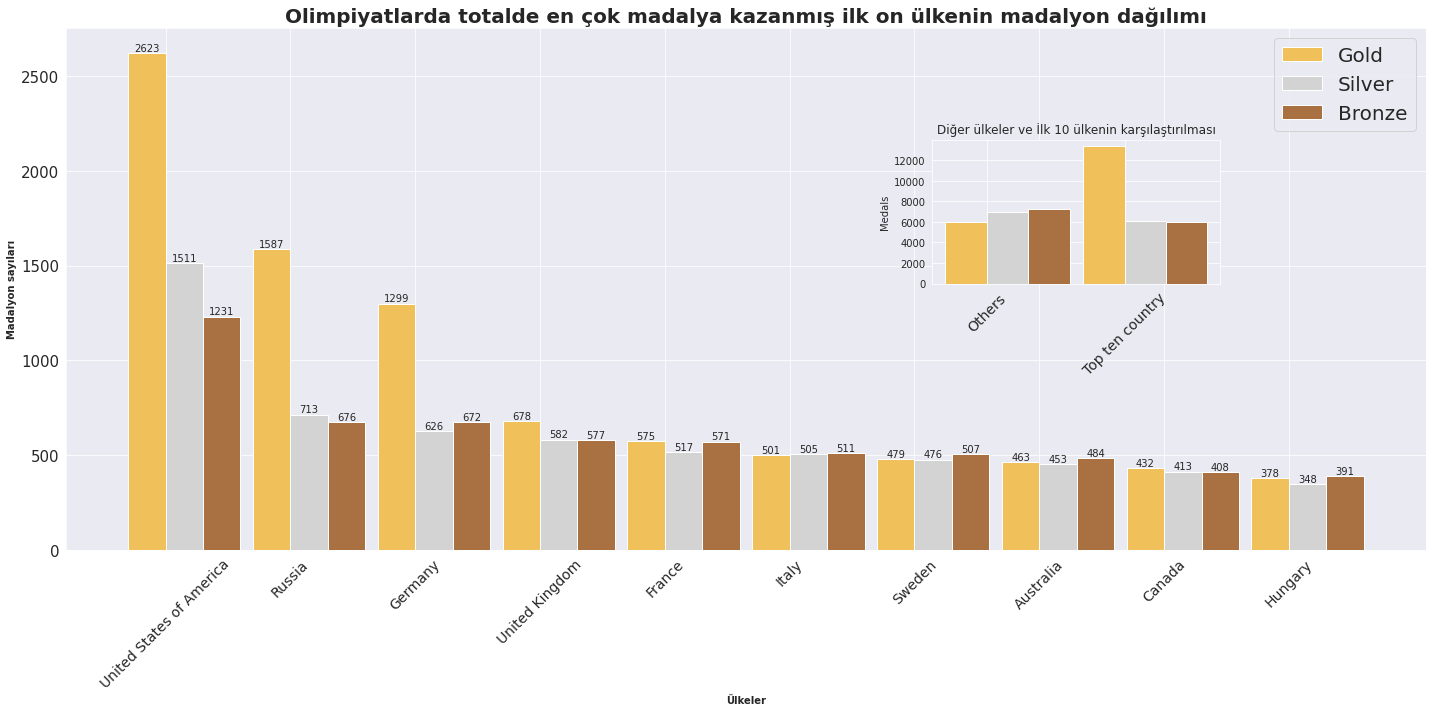

In [92]:
fig,ax = plt.subplots(figsize = (20,10))
top_10 = ['United States of America', 'Russia', 'Germany', 'United Kingdom','France', 'Italy', 'Sweden', 'Australia', 'Canada', 'Hungary']
top_10_country_names = top_10
othersvstopten = ['Others','Top ten country']
othersvstopten_gold = [5988,13329]
othersvstopten_silver = [6951,6126]
othersvstopten_bronze = [7257,6002]
top_10_gold_medals = gold_values[:10]
top_10_silver_medals = silver_values[:10]
top_10_bronze_medals = bronze_values[:10]
indices = 10 #Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis


width = 0.3 #width of bars
ax.bar(ind, top_10_gold_medals, data=top_10,width=width,color = "#f0c05a", label = 'Gold')
ax.bar_label(ax.containers[0])
ax.bar(ind+width, top_10_silver_medals, data=top_10,width=width,color = 'lightgray', label = 'Silver')
ax.bar_label(ax.containers[1])
ax.bar(ind+2*width, top_10_bronze_medals, data=top_10,width=width, color = '#a97142', label = 'Bronze')
ax.bar_label(ax.containers[2])

plt.title('Olimpiyatlarda totalde en çok madalya kazanmış ilk on ülkenin madalyon dağılımı', fontweight = 'bold', fontsize=20)
plt.xlabel('Ülkeler', fontsize = 10, fontweight = 'bold')
plt.ylabel('Madalyon sayıları', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



ax.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks(fontsize=14, rotation=45)
#ax.set_xticks(ind + width / 2)


plt.xticks(ind+width/2,top_10_country_names,fontsize=14,rotation=45)
plt.tight_layout()

a = plt.axes([.65, .6, .2, .2])
indices = 2 #Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis
plt.bar(ind, othersvstopten_gold, data=othersvstopten,width=width,color = "#f0c05a", label = 'Gold')
plt.bar(ind+width, othersvstopten_silver, data=othersvstopten,width=width,color = 'lightgray', label = 'Silver')
plt.bar(ind+2*width, othersvstopten_bronze, data=othersvstopten,width=width, color = '#a97142', label = 'Bronze')
plt.title('Diğer ülkeler ve İlk 10 ülkenin karşılaştırılması')
plt.xticks(ind+width/2,othersvstopten,fontsize=14,rotation=45)
plt.ylabel('Medals')


plt.show()

Burada iki farklı durum görebilmekteyiz. En çok madalyon kazanmış ilk on ülke aslında tüm madalyonların yarısını kazanmıştır ve bu ilk on ülke özellikle de altın madalyon kazanmıştır diyebiliriz. Bunu hızlı bir uyum analizinde gösterebiliriz. 

In [93]:
df

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal,NOC,region,notes,Host_Country
0,An Yulong,M,19.0,173.0,70.0,China,CHN,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CHN,China,NaN,Other
1,An Yulong,M,19.0,173.0,70.0,China,CHN,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,CHN,China,NaN,Other
2,An Yulong,M,23.0,173.0,70.0,China,CHN,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,CHN,China,NaN,Other
3,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,CHN,China,NaN,United States of America
4,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,CHN,China,NaN,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,Hong Anh Tun,M,23.0,152.0,56.0,Vietnam,VIE,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Bantamweight,Silver,VIE,Vietnam,NaN,China
39770,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,VIE,Vietnam,NaN,Brazil
39771,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,VIE,Vietnam,NaN,Brazil
39772,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,VIE,Vietnam,NaN,Australia


[İçindekiler Menüsüne Git](#0.)  
## 8.4 Çoklu uyum analizi <a id="8.4"></a>
## 

In [94]:
#!pip install prince
#import prince
#top_ten_mca = df.groupby(['region','medal'])['medal'].count().unstack().fillna(0).astype(int).reset_index()
#top_ten_mca['total'] = top_ten_mca['Bronze']+top_ten_mca['Gold']+top_ten_mca['Silver']
#top_ten_mca= top_ten_mca.sort_values(by='total',ascending=False)[:10].reset_index()
#top_ten_mca=top_ten_mca[['region','Bronze','Silver','Gold']]
#top_ten_mca['GDP']= [20.94,1.48,3.86,2.70,2.63,1.88,0.53,1.64,1.33,0.15] #GDP'ler 2020 senesi için alınmış ve trilyon dolar ölçeğindedir.
#top_ten_mca
#mca = prince.MCA(n_components=10)
#mca.fit(top_ten_mca)
#mca.plot_coordinates(top_ten_mca,
#                     figsize=(10, 10),
#                     show_column_labels=True,show_row_points=False,row_points_alpha=.5,
#                     row_points_size=0,show_row_labels=False,show_column_points=True,
#                     column_points_size=300,legend_n_cols=2).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [95]:
top_ten_mca = df.groupby(['region','medal'])['medal'].count().unstack().fillna(0).astype(int).reset_index()
top_ten_mca['total'] = top_ten_mca['Bronze']+top_ten_mca['Gold']+top_ten_mca['Silver']
top_ten_mca= top_ten_mca.sort_values(by='total',ascending=False)[:10].reset_index()
top_ten_mca=top_ten_mca[['region','Bronze','Silver','Gold','total']]
top_ten_mca['GDP']= [20.94,1.48,3.86,2.70,2.63,1.88,0.53,1.64,1.33,0.15] #GDP'ler 2020 senesi için alınmış ve trilyon dolar ölçeğindedir.
top_ten_mca

medal,region,Bronze,Silver,Gold,total,GDP
0,United States of America,1356,1640,2623,5619,20.94
1,Russia,1171,1163,1587,3921,1.48
2,Germany,1256,1193,1299,3748,3.86
3,United Kingdom,650,739,678,2067,2.70
4,France,666,609,501,1776,2.63
5,Italy,531,528,575,1634,1.88
6,Sweden,535,522,479,1536,0.53
7,Canada,451,438,463,1352,1.64
8,Australia,522,459,368,1349,1.33
9,Hungary,371,332,432,1135,0.15


In [96]:
top_ten_mca.sort_values(by= 'Silver',ascending=False)

medal,region,Bronze,Silver,Gold,total,GDP
0,United States of America,1356,1640,2623,5619,20.94
2,Germany,1256,1193,1299,3748,3.86
1,Russia,1171,1163,1587,3921,1.48
3,United Kingdom,650,739,678,2067,2.70
4,France,666,609,501,1776,2.63
5,Italy,531,528,575,1634,1.88
6,Sweden,535,522,479,1536,0.53
8,Australia,522,459,368,1349,1.33
7,Canada,451,438,463,1352,1.64
9,Hungary,371,332,432,1135,0.15


![Çoklu uyum analizi](https://preview.redd.it/rcfwc0exmnk81.png?width=744&format=png&auto=webp&s=ed1593c9332fb6e5a72879c6b595047b68a41bee)

* Bu kod kerneli patlatıyor localinizde deneyin lütfen.
* Bu analize göre GDP neredeyse en çok amerikaya yakın ancak altın, gümüş ve bronz madalyon sayıları eşit olduğundan çok fazla yardımcı olamadı ne yazık ki. Yine de Altın özelliği x+ sahada kalmıştır ve bu sahada da sadece 2 en yüksek madalyon kazanmış ülke olmasından dolayı bir miktar uyumu göstermiş olduğunu belirte biliriz.

* Bronz ve gümüş kazanım sıraları çok farklılık göstermiyor, bu nedenle gümüş ve bronz birbirlerine oldukça yakın yine de güöüş -y düzlemine daha çok gitmekte ve burada sıralama, pek bir ayırım yapmamakta. İncelenecek olursa zaten, gümüş,bronz ve altın sayıları birbirine yakın olduğu görülür.    

In [97]:
hosting_year_df = df.groupby(by='year',as_index=False).first()

In [98]:
hostin_country_sorted_values =pd.DataFrame(hosting_year_df.Host_Country.value_counts(ascending=False).values)
hostin_country_sorted_values['countries'] = hosting_year_df.Host_Country.value_counts(ascending=False).index
hostin_country_sorted_values.rename(columns={0:'time'},inplace=True)

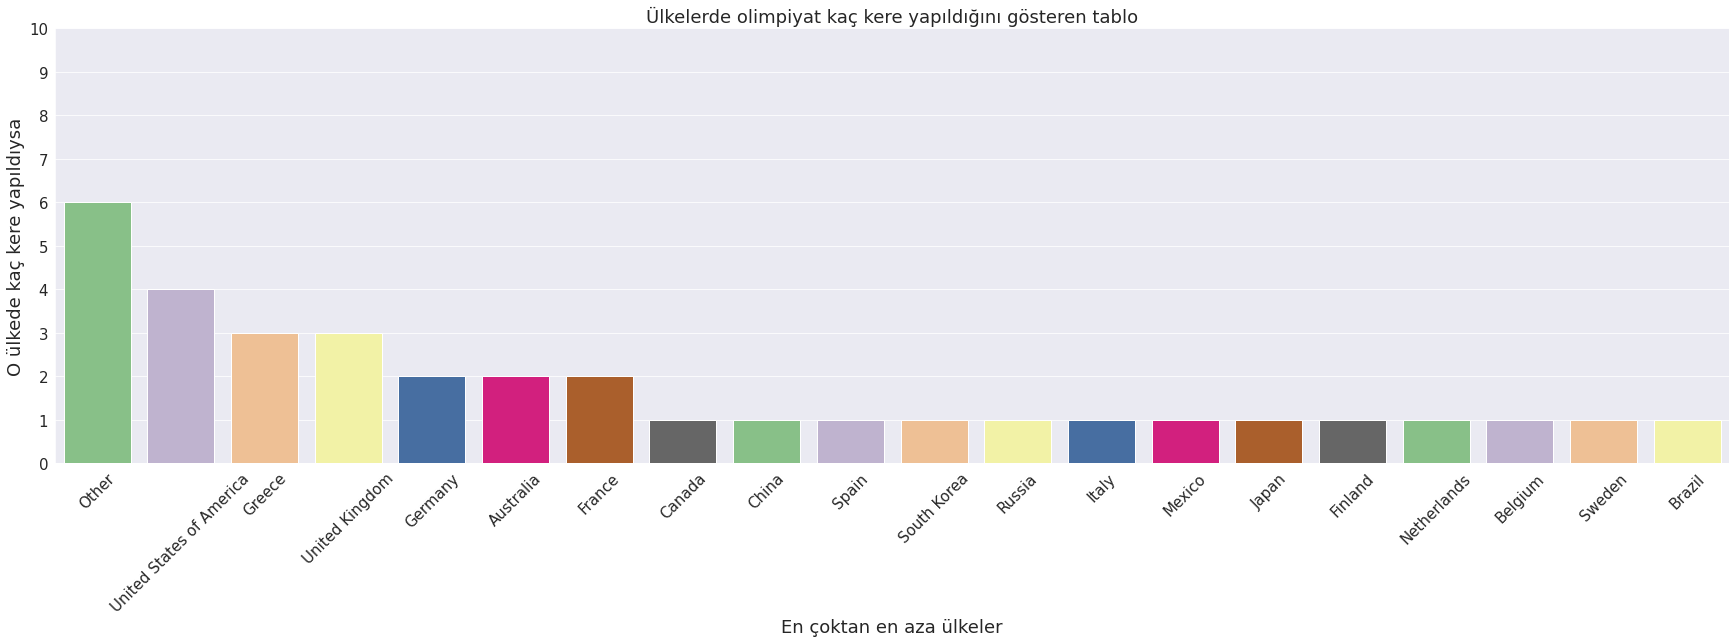

In [99]:
plt.figure(figsize=(30,8))
sns.barplot(y=hostin_country_sorted_values.time,x=hostin_country_sorted_values.countries, palette='Accent')
plt.yticks(range(0,11,1))
plt.xticks(rotation=45)
plt.ylabel('O ülkede kaç kere yapıldıysa',fontsize=18)
plt.xlabel('En çoktan en aza ülkeler',fontsize=18)
plt.title('Ülkelerde olimpiyat kaç kere yapıldığını gösteren tablo',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

[İçindekiler Menüsüne Git](#0.)  
## 8.5 Ev sahibi misafire karşı <a id="8.5"></a>
## 

## Peki ülklerin kazandıkları madalyon sayılarına kendi ülkelerinde düzenlenen olimpiyatların bir etkisi olmuş mudur?

In [100]:
def percentage_medals(df):
    us_df = df[(df.region=='United States of America')]
    us_gold = []
    us_silver = []
    us_bronze = []
    olympic_years = list(df.year.value_counts().sort_index(ascending=True).index)
    for i in range(len(olympic_years)):
        years = list(us_df[(us_df['year']==olympic_years[i])].medal.value_counts())
        us_gold.append(years[0])
        us_silver.append(years[1])
        us_bronze.append(years[2])
    total_array = (np.array(us_gold))+(np.array(us_silver))+(np.array(us_bronze))
    us_goldp = np.round(100*((np.array(us_gold))/total_array),2)
    us_silverp= np.round(100*((np.array(us_silver))/total_array),2)
    us_bronzep= np.round(100*((np.array(us_bronze))/total_array),2)
    # Define Data
    medals_us_df = pd.DataFrame()
    #medals_us_df['year'] = olympic_years
    medals_us_df['gold'] = us_goldp
    medals_us_df['silver'] = us_silverp
    medals_us_df['bronze'] = us_bronzep
    Class = olympic_years
    import matplotlib
    # Plot stacked bar chart
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f0c05a','lightgray','#a97142'])
    colors = ['#f0c05a','lightgray','#a97142']
    ax = medals_us_df.plot(stacked=True, kind='bar',figsize=(20,5),cmap=cmap)
    
    for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        label_text = np.round(height,2)
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center',    
                va='center',rotation='vertical',color='black',size=8)
    
        ax.set_xticklabels(Class,rotation='horizontal')
        
    ax.axvspan(2.5, 3.5, facecolor='#244747',alpha=.2)
    ax.axvspan(8.5, 9.5, facecolor='#244747',alpha=.2)
    ax.axvspan(19.5, 20.5, facecolor='#244747',alpha=.2)
    ax.axvspan(23.5, 24.5, facecolor='#244747',alpha=.2)
    #24-20-9-3 -> axvspan'ın listesırasını aldığını öğrenene kadar en az 1 saat bunu denedim
    ax.axhline(y=us_goldp.mean(),alpha=.5,color='#f0c05a')
    ax.text(-1,us_goldp.mean(), "{:.0f}".format(us_goldp.mean()), color="#f0c05a",ha="left", va="center")
    ax.axhline(y=us_silverp.mean(),alpha=.5,color='lightgray')
    ax.text(-1,us_silverp.mean(), "{:.0f}".format(us_silverp.mean()), color="lightgray",ha="left", va="center")
    ax.axhline(y=us_bronzep.mean(),alpha=.5,color='#a97142')
    ax.text(-1,us_bronzep.mean(), "{:.0f}".format(us_bronzep.mean()), color="#a97142",ha="left", va="center")
    ax.set_yticklabels(range(0,100,100))
    ax.legend(loc='upper right')
    plt.title("Olimpiyatlarda Amerika'nın kazandığı madalyonlar")
    plt.show()

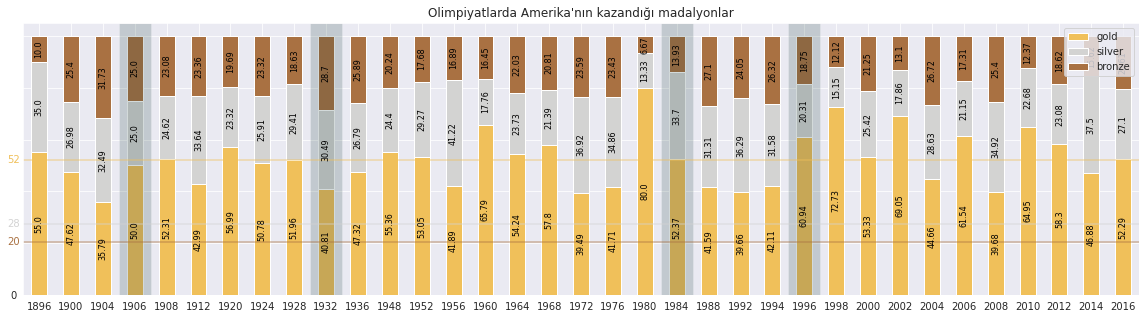

In [101]:
percentage_medals(df)
# bu kodlamanın daha da güzelleşebileceğinin farkındayım sadece aşırı fazla zaman harcayınca sıkıldım.
# Ama Amerikanın diğer ülkeleri misafir ettiği yıllarda çok da fazla avantajlı olmadığını düşünebiliriz.

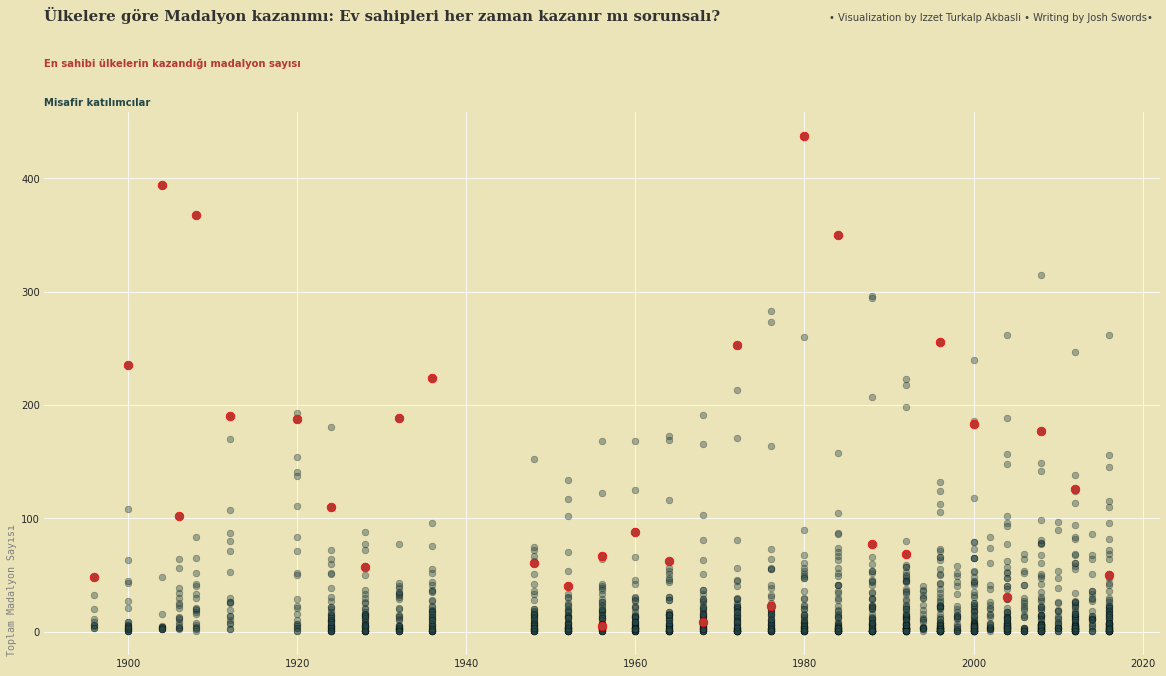

In [102]:
df_new = df.groupby(['year','Host_Country','region','medal',])['medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']


background_color='#EBE4B9'
fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor=background_color)

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='year', y='Total Medals', s=45, ec='black', color='#244747',ax=ax,alpha=0.4)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='year', y='Total Medals', s=75, ec='red', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Toplam Madalyon Sayısı",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("")

ax.set_facecolor(background_color)
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(Xstart,Yend+80, 'Ülkelere göre Madalyon kazanımı: Ev sahipleri her zaman kazanır mı sorunsalı?', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+40, 'En sahibi ülkelerin kazandığı madalyon sayısı', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+5, 'Misafir katılımcılar', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')
ax.text(Xend-20,Yend+80,"• Visualization by Izzet Turkalp Akbasli • Writing by Josh Swords•",color='#404040',fontsize=10,ha="center")
plt.show()

#### Bu görselde;

* Ev sahibi ülkelerin diğer ülkelerden sıklıkla daha fazla madalyon topladığını görebiliriz

* Ancak genellikle bu ülkelerin gelişmiş ülkeler olduğunu unutmamak gerekir, bu yönde bir biyas olabilir. 

##### Ev Sahibi Ülkeler

Bu nedenle, birçok ülkenin Olimpiyat oyunlarında tutarlı bir şekilde iyi performans gösterdiğini biliyoruz. Ancak bu projenin doğrulamak istediği şey bu değil.

Artık odağı oyunlara ev sahipliği yapanlara kaydırmanın zamanı geldi.

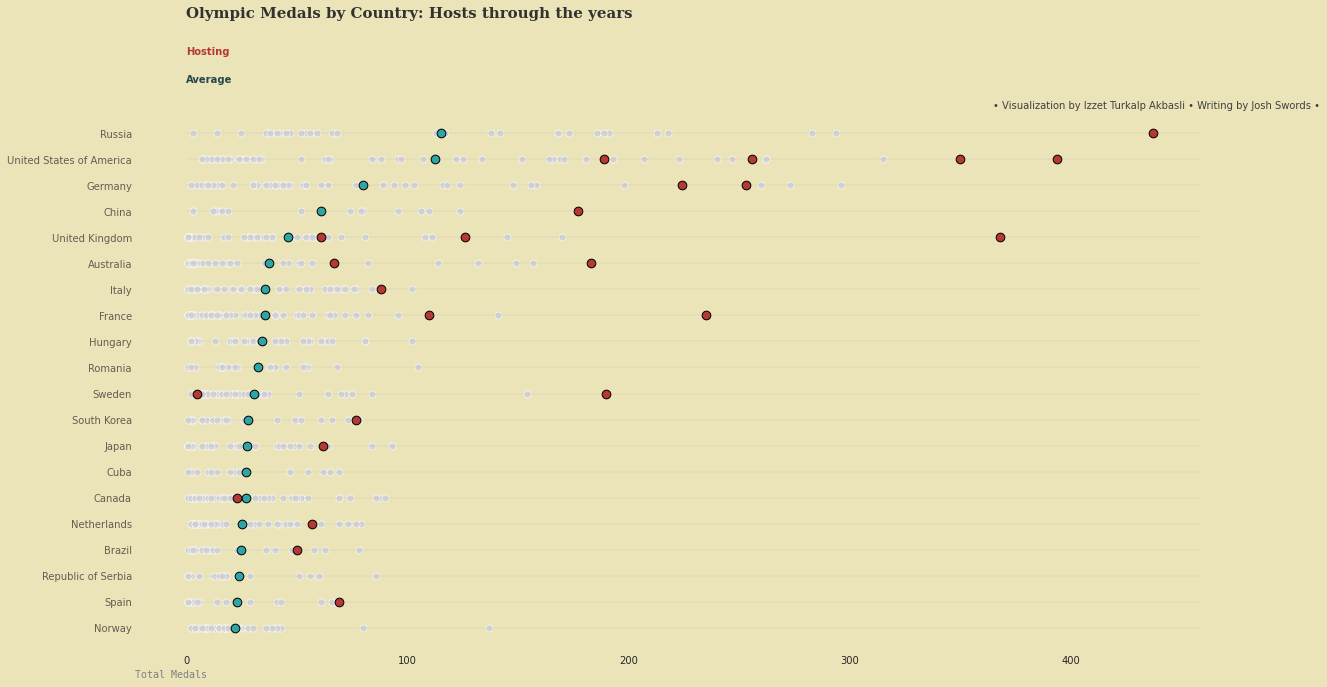

In [103]:
fig, ax = plt.subplots(1,1, figsize=(20, 10), facecolor=background_color)

# top 20
top_list_ = df_new.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = df_new[df_new['region'] == country].groupby('region')['Total Medals'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x=mean,color='#2ea6a6',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['region'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor(background_color)
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.grid(False)

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    


ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.1, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1, 'Average', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')
ax.text(Xend-20,Yend,"• Visualization by Izzet Turkalp Akbasli • Writing by Josh Swords •",color='#404040',fontsize=10,ha="center")

plt.show()

### Burada görselleştirilen;
- Burada En çok madalya kazanan ilk 15 ülke mevcut
- Tarihsel sonuçlar gri noktalar ile belirlendi
- Kırmızı noktalar ise o ülkenin ev sahipliği döneminde kazandığı madalyon
- Mavi noktalar ise ortalama değeri vermektedir
#### Buradan kesinlikle ev sahibi olmanın bir kaç istisna haricinde daha çok kazanmakla ilişkisi var diyebiliriz.
##### * Ben bu görselde uzun süre Amerika neden bu kdr düşük diye anlamaya çalıştım ancak sonrasında 35 senedir katıldığı için Rusya'dan kıl payı geride kalıyor ortalaması, ama total olarak bakacak olursak en yüksek Amerika olur.

[İçindekiler Menüsüne Git](#0.)        

## 9. Canım Türkiye'm <a id="9"></a>
## 

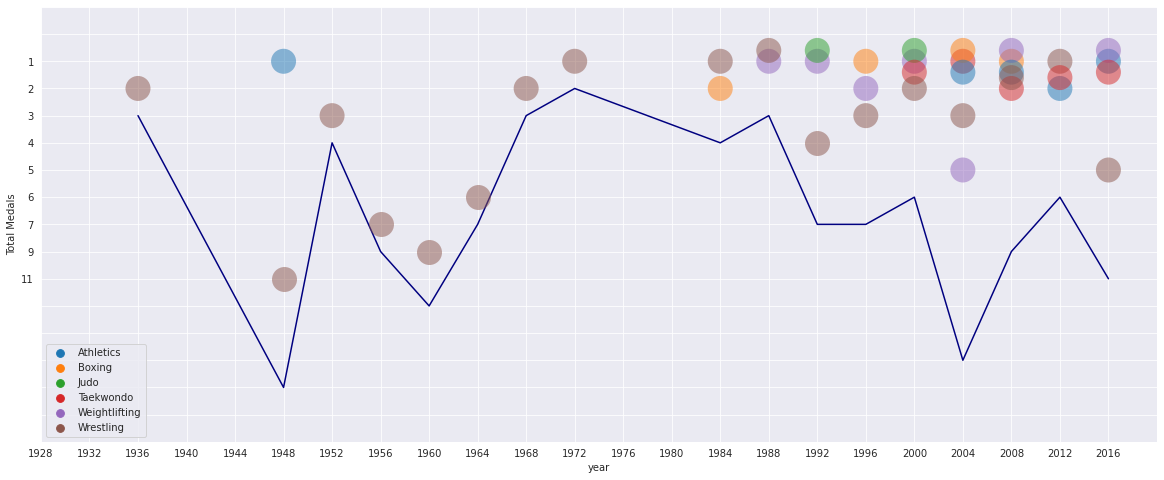

In [104]:
turkey_df = df[(df.region=='Turkey')].groupby(['sport','year','medal'])['medal'].count().unstack().fillna(0).astype(int).reset_index()
turkey_df['Total Medals'] = turkey_df['Bronze'] + turkey_df['Silver'] + turkey_df['Gold']
turkey_df= turkey_df.drop(columns=["Bronze","Gold","Silver"])
turkey_history= df[(df.region=='Turkey')].year.value_counts()
plt.figure(figsize=(20,8))
sns.lineplot(x=turkey_history.index,y=list(turkey_history.values),color='navy')
sns.swarmplot(data=turkey_df,x='year',y='Total Medals',hue='sport',s=25,alpha=.5,orient='horizontal',dodge=False)
plt.legend(loc='lower left')
plt.grid(True)
plt.xticks(range(1928,2020,4))
plt.yticks(range(-2,15,1))
plt.show()

Burada mazur görün lütfen scatterplot ile overlap sorunu yaşadım bu nedenle swarmplot ile göstermek istedim, Lineplot ile normal seyrinde ancak swarmplot ile dodge=False diyerek overlap'ı önledim ve bunların orjini ymax ile başlıyor, alt alta toplanırsa o seneki total kazanımı gösteriyor.

In [105]:
import plotly.express as px
import pandas as pd
radardf = pd.DataFrame(dict(
    r=[63,12,6,7,5,2],
    theta=list(turkey_df.sport.value_counts().index)))
fig = px.line_polar(radardf, r='r', theta='theta', line_close=True)
fig.show()

En iyi olduğumuz alan Güreş sanırım

1 = Russia
2 = United States of America
3 = Sweden
4 = Finland
5 = Bulgaria
6 = Japan
7 = Turkey
8 = Hungary
9 = Germany
10 = Iran


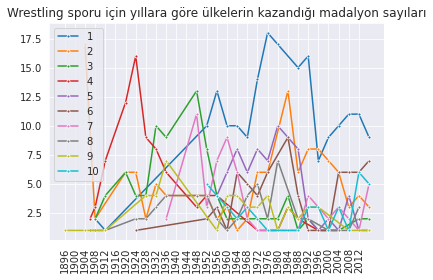

In [106]:
country_medal_by_sport(df,'Wrestling',10)
# İlk on ülke içerisinde 7. sırada olduğumuzu görebiliriz.

[İçindekiler Menüsüne Git](#0.)  

# 10. Sonuç ve teşekkürler <a id="10"></a>

### Burada genel olarak datayı iyi bir şekilde değerlendirdiğimi düşünüyorum
### Bu datayla bir ML modeli elbette yapılabilir ancak ben bu açıdan çok zorlamak istemedim hali hazırda kernel ağırlık nedeniyle sürekli patlıyor zaten.

## Teşekkürler;
- DATAI team
- Asım Egemen Yılmaz
- Kodlarını kullandığım arkadaşlara teşekkür ederim;
    - [Josh Swords](https://www.kaggle.com/joshuaswords/does-hosting-the-olympics-improve-performance)
    
    - [Drazen](https://www.kaggle.com/drazen/heatmap-with-sized-markers)
    - Her zaman ki gibi Stackoverflow

# Belki devam ederim Kernel ölmezse :D